### In this dataset we have to predict the final prices of the houses from features given. The dataset cointains 79 explanatory variables. We will explore the data and apply Advanced regression techniques like random forest and gradient boosting.



In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")

# importing custom matplotlib parameters for vizualizations
plt.rcParams['figure.figsize'] = (14,4)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams["font.family"] = "monospace";

# Color Palettes
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]

In [4]:
#importing Dataset
house = pd.read_csv("C:\\Users\\shilp\\OneDrive\\Documents\\Cognorise Internship\\data.csv")

#checking dataset
house.head()

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
#describe the data with some visual style by applying T = Transpose and style
house.describe().T.style.bar(subset=['mean'],color=colors[3]).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
price,4600.000000,551962.988473,563834.702547,0.000000,322875.000000,460943.461550,654962.500000,26590000.000000
bedrooms,4600.000000,3.400870,0.908848,0.000000,3.000000,3.000000,4.000000,9.000000
bathrooms,4600.000000,2.160815,0.783781,0.000000,1.750000,2.250000,2.500000,8.000000
sqft_living,4600.000000,2139.346957,963.206916,370.000000,1460.000000,1980.000000,2620.000000,13540.000000
sqft_lot,4600.000000,14852.516087,35884.436145,638.000000,5000.750000,7683.000000,11001.250000,1074218.000000
floors,4600.000000,1.512065,0.538288,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,4600.000000,0.007174,0.084404,0.000000,0.000000,0.000000,0.000000,1.000000
view,4600.000000,0.240652,0.778405,0.000000,0.000000,0.000000,0.000000,4.000000
condition,4600.000000,3.451739,0.677230,1.000000,3.000000,3.000000,4.000000,5.000000
sqft_above,4600.000000,1827.265435,862.168977,370.000000,1190.000000,1590.000000,2300.000000,9410.000000


In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0                  4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

📌 Summary

‣ We imported the dataset
‣ we also looked at info where we found out that there are 3 types of datatypes float64(3), int64(35), object(43)
‣ we also saw the stats of data.

## Target Variable

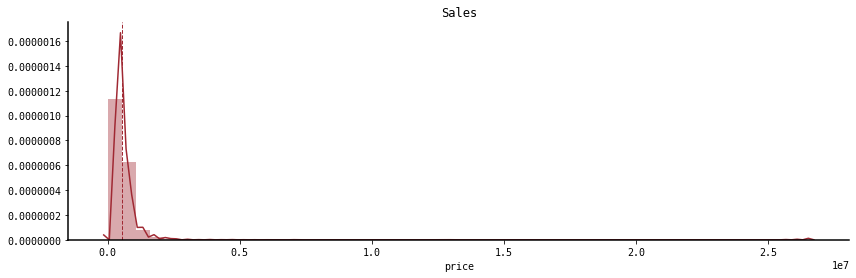

In [11]:
#checking the target variables for distribution
sns.distplot(house['price'],color=colors[7])
plt.axvline(x=house['price'].mean(), color=colors[7], linestyle='--', linewidth=1)
plt.title('Sales');

## Missing Values

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'missing' is a DataFrame that you've calculated before

if not missing.empty:
    missing = missing[missing > 0]
    missing = missing.sort_values(ascending=False)
    missing.plot.bar(color='red')
    plt.title('Missing Data')
    plt.show()
else:
    print("No missing data to plot.")

No missing data to plot.


### Corelation

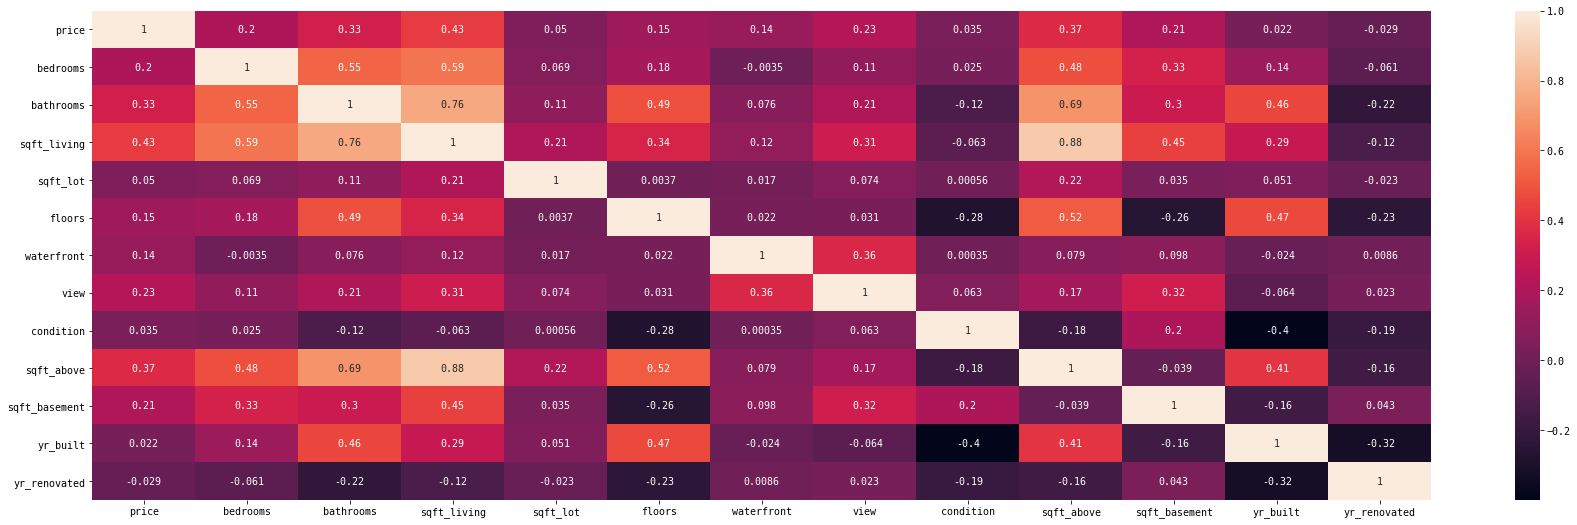

In [14]:
plt.figure(figsize=(30,9))
sns.heatmap(house.corr(),annot=True);

## Pre Processing

In [16]:
num_cols = [col for col in house.columns if house[col].dtype in ['float64','int64']]
cat_cols = [col for col in house.columns if house[col].dtype not in ['float64','int64']]

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

house[num_cols] = SimpleImputer().fit_transform(house[num_cols])
house[num_cols] = SimpleImputer().fit_transform(house[num_cols])

house[num_cols] = MinMaxScaler().fit_transform(house[num_cols])
house[num_cols] = MinMaxScaler().fit_transform(house[num_cols])

In [22]:
columns_None = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above',
                'sqft_basement','yr_built','yr_renovated','street','city','statezip','country']
house[columns_None] = house[columns_None].fillna('none')


In [24]:
from sklearn.preprocessing import OneHotEncoder

print("Encoded Columns:", encoded_cols)
print("DataFrame Columns:", house.columns)

Encoded Columns: [' _5/10/2014 0:00', ' _5/11/2014 0:00', ' _5/12/2014 0:00', ' _5/13/2014 0:00', ' _5/14/2014 0:00', ' _5/15/2014 0:00', ' _5/16/2014 0:00', ' _5/17/2014 0:00', ' _5/18/2014 0:00', ' _5/19/2014 0:00', ' _5/2/2014 0:00', ' _5/20/2014 0:00', ' _5/21/2014 0:00', ' _5/22/2014 0:00', ' _5/23/2014 0:00', ' _5/24/2014 0:00', ' _5/25/2014 0:00', ' _5/26/2014 0:00', ' _5/27/2014 0:00', ' _5/28/2014 0:00', ' _5/29/2014 0:00', ' _5/3/2014 0:00', ' _5/30/2014 0:00', ' _5/31/2014 0:00', ' _5/4/2014 0:00', ' _5/5/2014 0:00', ' _5/6/2014 0:00', ' _5/7/2014 0:00', ' _5/8/2014 0:00', ' _5/9/2014 0:00', ' _6/1/2014 0:00', ' _6/10/2014 0:00', ' _6/11/2014 0:00', ' _6/12/2014 0:00', ' _6/13/2014 0:00', ' _6/14/2014 0:00', ' _6/15/2014 0:00', ' _6/16/2014 0:00', ' _6/17/2014 0:00', ' _6/18/2014 0:00', ' _6/19/2014 0:00', ' _6/2/2014 0:00', ' _6/20/2014 0:00', ' _6/21/2014 0:00', ' _6/22/2014 0:00', ' _6/23/2014 0:00', ' _6/24/2014 0:00', ' _6/25/2014 0:00', ' _6/26/2014 0:00', ' _6/27/2014

In [27]:
# Print the names of the columns obtained after one-hot encoding
print("Encoded Columns:", encoded_cols)

# Print the names of the columns in the DataFrame
print("DataFrame Columns:", house.columns)

# Check if all encoded columns are present in the DataFrame
missing_cols = set(encoded_cols) - set(house.columns)
print("Missing Columns:", missing_cols)

# Perform the transformation only if there are no missing columns
if not missing_cols:
    house[encoded_cols] = encoder.transform(house[cat_cols])
else:
    print("Missing columns detected. Check the column names and try again.")

Encoded Columns: [' _5/10/2014 0:00', ' _5/11/2014 0:00', ' _5/12/2014 0:00', ' _5/13/2014 0:00', ' _5/14/2014 0:00', ' _5/15/2014 0:00', ' _5/16/2014 0:00', ' _5/17/2014 0:00', ' _5/18/2014 0:00', ' _5/19/2014 0:00', ' _5/2/2014 0:00', ' _5/20/2014 0:00', ' _5/21/2014 0:00', ' _5/22/2014 0:00', ' _5/23/2014 0:00', ' _5/24/2014 0:00', ' _5/25/2014 0:00', ' _5/26/2014 0:00', ' _5/27/2014 0:00', ' _5/28/2014 0:00', ' _5/29/2014 0:00', ' _5/3/2014 0:00', ' _5/30/2014 0:00', ' _5/31/2014 0:00', ' _5/4/2014 0:00', ' _5/5/2014 0:00', ' _5/6/2014 0:00', ' _5/7/2014 0:00', ' _5/8/2014 0:00', ' _5/9/2014 0:00', ' _6/1/2014 0:00', ' _6/10/2014 0:00', ' _6/11/2014 0:00', ' _6/12/2014 0:00', ' _6/13/2014 0:00', ' _6/14/2014 0:00', ' _6/15/2014 0:00', ' _6/16/2014 0:00', ' _6/17/2014 0:00', ' _6/18/2014 0:00', ' _6/19/2014 0:00', ' _6/2/2014 0:00', ' _6/20/2014 0:00', ' _6/21/2014 0:00', ' _6/22/2014 0:00', ' _6/23/2014 0:00', ' _6/24/2014 0:00', ' _6/25/2014 0:00', ' _6/26/2014 0:00', ' _6/27/2014

ㅤ🧮Model Selection and Predictingㅤ

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
# Ensure that all columns in num_cols and encoded_cols are present in the DataFrame
all_cols = num_cols + encoded_cols
missing_cols = set(all_cols) - set(house.columns)

if missing_cols:
    print("Missing columns:", missing_cols)
else:
    # Create training and validation sets
    X_train, X_test, y_train, y_test = train_test_split(house[all_cols], y, test_size=0.25, random_state=42)

    # Continue with your further processing or modeling
    # ...


Missing columns: {'street_28001 232nd Pl SE', 'street_2971 NE Marquette Way', 'street_8517 143rd Ct NE', ' _6/19/2014 0:00', 'street_28123 123rd Pl SE', 'street_2637 22nd Ave W', 'street_800 NE 95th St', 'street_14423 25th Ave SW', 'street_2469 132nd Ave SE', 'street_493 S 187th Ln', 'street_15845 SE 44th Ct', 'street_32827 22nd Ave SW', 'street_11631 170th Ct NE', 'street_17732 199th Pl NE', 'street_1820 38th Ave E', 'street_806 15th Ave E', 'street_107 E 3rd St', 'street_2008 Yale Ave E', 'street_373 NE Eagle Way', 'street_4018 NE 6th Ct', 'street_16528 SE Newport Way', 'street_4503 S 256th St', 'street_31845-31899 125th Pl SE', 'street_23607 NE 72nd St', 'street_11125 115th Ave NE', 'street_7815 116th Ave SE', 'street_27645 236th Ct SE', 'street_6723 12th Ave NW', 'city_Issaquah', 'street_1718 44th Ave SW', 'street_34025 39th Ave S', 'street_15617 160th Ct SE', 'street_236 NW 176th Pl', 'street_15345 Stone Ave N', 'street_7111 S Ryan St', 'street_7752 33rd Ave NW', 'street_14812 113

### Regression Models

In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
!pip install xgboost

In [34]:
from xgboost import XGBRegressor

In [35]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [36]:
#making dictionary of models
models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [37]:
#taking results from the models
model_results = []
model_names = []

# training the model with function
for name,model in models.items():
    a = model.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    
print(df_results)

NameError: name 'X_train' is not defined

‣ We tried multiple models but the best model was with lowest RMSE "XGB Regressor".
‣ Now the question arise how we can further reduce the error? we can reduce it by using hyper parameter tuning, but how to decide ? how to guess the best parameters? ‣ Lets do it in our next step.

In [38]:
import optuna


'''

def objective(trial, data = inputs_df[numeric_cols + encoded_cols],target = targets):
    
    #x, y = inputs_df[numeric_cols + encoded_cols], targets
    X_train,X_test,y_train,y_test = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)
    param = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': trial.suggest_categorical('n_estimators', [1000,2000,3000,4000]),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = XGBRegressor(**param)  
    
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)
    preds_valid = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds_valid, squared=False)
    return rmse

    
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

study.best_params

'''

ModuleNotFoundError: No module named 'optuna'

In [39]:
#taking best params
best_params = {'lambda': 3.559040735218393,
 'alpha': 0.25772549522868987,
 'colsample_bytree': 0.6,
 'subsample': 0.5,
 'learning_rate': 0.014,
 'n_estimators': 4000,
 'max_depth': 11,
 'random_state': 24,
 'min_child_weight': 3}

In [40]:
#applying it in the model
XGBR = XGBRegressor(**best_params)

XGBR.fit(X_train, y_train)
predicted = XGBR.predict(X_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')

NameError: name 'X_train' is not defined

In [42]:
test_preds = XGBR.predict(house[num_cols + encoded_cols])

KeyError: "['street_28001 232nd Pl SE', 'street_2971 NE Marquette Way', 'street_8517 143rd Ct NE', ' _6/19/2014 0:00', 'street_28123 123rd Pl SE', 'street_2637 22nd Ave W', 'street_800 NE 95th St', 'street_14423 25th Ave SW', 'street_2469 132nd Ave SE', 'street_493 S 187th Ln', 'street_15845 SE 44th Ct', 'street_32827 22nd Ave SW', 'street_11631 170th Ct NE', 'street_17732 199th Pl NE', 'street_1820 38th Ave E', 'street_806 15th Ave E', 'street_107 E 3rd St', 'street_2008 Yale Ave E', 'street_373 NE Eagle Way', 'street_4018 NE 6th Ct', 'street_16528 SE Newport Way', 'street_4503 S 256th St', 'street_31845-31899 125th Pl SE', 'street_23607 NE 72nd St', 'street_11125 115th Ave NE', 'street_7815 116th Ave SE', 'street_27645 236th Ct SE', 'street_6723 12th Ave NW', 'city_Issaquah', 'street_1718 44th Ave SW', 'street_34025 39th Ave S', 'street_15617 160th Ct SE', 'street_236 NW 176th Pl', 'street_15345 Stone Ave N', 'street_7111 S Ryan St', 'street_7752 33rd Ave NW', 'street_14812 113th Ave NE', 'street_6407 282nd Ave SE', 'street_13607 SE 10th St', 'street_5451 Fauntleroy Way SW', 'street_17736 41st Ave S', 'street_15 Mt Pilchuck Ave NW', 'street_2508 NE 7th St', 'street_3539 NW 67th St', 'street_4924 SE 2nd Pl', 'street_8007 Fremont Ave N', 'street_4412 170th Ave SE', 'street_14821 272nd Pl NE', 'street_13342 30th Ave NE', 'street_34403 30th Ave SW', 'city_Kirkland', 'street_36400-36452 51st Ave S', 'street_5237 Martin Luther King Jr Way S', 'street_2002 28th Ave W', 'street_2518 1st Ave W', 'street_18716 35th Ave NE', 'street_4776 34th Ave NE', 'street_23103 125th Ave SE', 'street_26069 SE 154th St', 'street_6046 126th Ave NE', 'street_138 Seattle Blvd S', 'street_4751 Stephens Ave', 'street_29024 121st Way SE', 'street_26300-26398 124th Ave SE', 'street_7820 Ashworth Ave N', 'street_26529 161st Ave SE', 'street_35131 SE Ridge St', 'street_10000-10026 S 100th St', 'street_5535 Elaine Ave SE', 'street_667 237th Pl SE', 'street_13045 6th Pl SW', 'street_26th Ave SW', 'street_33247-33248 2nd Pl SW', 'street_7615 E Mercer Way', 'street_11406 Nile Ave NE', 'street_22721-22727 SE 27th St', 'street_4055 238th Pl SE', 'street_6605-6609 141st Pl NE', 'street_10774 155th Pl NE', 'street_7002 22nd Ave NW', 'street_1646 100th Pl SE', 'street_9326 SW 216th St', 'city_Lake Forest Park', 'street_14923 280th Pl NE', 'street_17510 194th Ave NE', 'street_19302 65th Pl NE', 'street_1405 E Maple St', 'street_45804 SE 137th St', 'street_920 221st Ave NE', 'street_2723 55th St SE', 'street_419 Wetherbee Ln', 'street_1404-1418 100th Ave NE', 'street_401 S 289th St', 'street_7250 Rainier Ave S', 'street_833 SW 361st St', 'street_23309 115th Pl SE', 'street_26118 189th Ct SE', 'street_1715 46th Ave SW', 'street_1006 NE Ravenna Blvd', 'street_802 NE 80th St', 'street_2647 22nd Ave W', 'street_13013 NE 202nd Pl', 'street_2328 246th Ave SE', 'street_14876 Juanita Woodinville Way NE', 'street_2320 N 161st St', 'street_7043 Mary Ave NW', 'street_7608 N Fork Rd SE', 'street_15924 NE 53rd St', 'street_8809 Densmore Ave N', ' _5/25/2014 0:00', 'street_21533 NE Woodinville Duvall Rd', 'street_427 27th Ave E', 'street_12923 206th Ct SE', 'street_6729 Shaffer Ave S', 'street_8264 154th Ave SE', 'street_2515 263rd Ct NE', 'street_2150 N 128th St', 'street_3665 50th Ave NE', 'street_9245-9249 Fremont Ave N', 'street_747 16th Ave E', 'street_16529 10th Ave NE', 'street_17435 SE 47th St', 'statezip_WA 98198', 'street_12054 NE 137th Ct', 'street_8627 9th Ave SW', 'street_16726 SE 45th St', 'street_16103 Kelly Rd NE', 'city_Maple Valley', 'street_1212 168th Ave NE', ' _5/20/2014 0:00', 'street_1783 Loraine St', 'street_2010 227th Ave SE', 'street_2622 W Lake Sammamish Pkwy SE', 'street_9881 244th Pl NE', 'street_36721 34th Ave S', 'street_15346-15348 25th Ave NE', 'street_26000-26198 Woodmont Dr S', 'street_755 Dayton Ave NE', 'street_3821-3825 Whitman Ave N', 'statezip_WA 98030', 'street_410 Wheeler St', 'street_21837 NE 102nd St', 'city_Woodinville', 'street_16901-17007 NE 160th Pl', 'street_10424 2nd Ave S', 'street_4201 Regal St', 'street_25707 SE 30th St', ' _6/28/2014 0:00', 'street_44400 SE 159th St', 'street_1118 235th Pl NE', 'street_15527 SE 79th Pl', 'street_27204 116th Pl SE', 'street_18616 215th Way NE', 'street_1816 2nd Ave N', 'street_21409 SE 215th St', 'street_26720 NE Stewart St', 'street_2598 NE Natalie Way', 'street_10515 Ashworth Ave N', 'street_1209 SW 347th Pl', 'street_1937 10th Ave W', 'street_30924 36th Ave SW', 'street_26715 Stanford Ct', 'street_9007 4th Ave NW', 'street_9320 318th Pl NE', 'street_21625 4th Ave S', 'street_20337 156th Ave NE', 'street_17780 13th Ave NW', 'street_2052 S 132nd St', 'street_5403 34th Ave SW', 'street_22514 101st Ln SW', 'street_8605 169th Ct NE', 'street_923 14th Ave E', 'street_6811 55th Ave NE', 'street_2033 211th Pl SE', 'street_4222 186th Pl SE', 'street_4036 S 119th St', 'street_1012 Lynnwood Ave NE', 'street_16803 426th Pl SE', 'street_25816 13th Pl S', 'street_12623 198th Dr NE', 'street_23109 125th Ave SE', 'street_114 210th Ave NE', 'street_22124 112th Pl SE', 'street_3856 38th Ave S', 'street_1124 NW 56th St', 'street_4530 48th Ave SW', 'street_2825 W Elmore St', 'street_3323-3325 33rd Ave SW', 'street_27840 38th Pl S', 'street_13315 88th Ave S', 'street_13008 23rd Ave S', 'street_18427 NE 26th Way', 'street_10312 Linden Ave N', 'street_1629 S 261st Pl', 'street_5022 Private Rd', 'street_625 212th Ave SE', 'street_36023 3rd Ave S', 'street_4801-4899 6th Ave NW', 'street_23337 NE 138th Way', 'street_3202 S 194th St', 'street_3227-3399 Mountain View Ave N', 'street_125 30th Ave', 'street_3009 W Emerson St', 'street_25806 136th Ave SE', 'street_15418 216th Ave NE', ' _6/25/2014 0:00', 'street_2363 30th Ave NE', 'street_3430 166th Ave SE', 'street_15871 37th Ave NE', 'street_409 20th Ave', 'street_1020 15th Ave E', 'street_2019 24th Ave S', 'street_29234 158th Ave SE', 'street_4531 S Lucile St', 'street_13540 Burke Ave N', 'street_7310 SW Maury Park Rd', 'street_7422-7426 NE 148th Ln', 'street_214 20th Ave S', 'street_2134 NW Boulder Way Dr', 'street_20703 NE 42nd Pl', 'street_544 NE 84th St', 'street_1920C SW Brandon St', 'street_15311 NE 62nd Ct', 'street_23733 NE Salal Pl', 'street_11815 SE 56th St', 'street_2847 NW 70th St', 'street_16014 16th Ave SW', 'street_9319 45th Ave SW', 'street_25523 123rd Pl SE', 'street_9510 28th Ave NW', 'street_23825 14th Ave S', 'street_6825 48th Ave NE', 'street_33749 29th Ct SW', 'street_6730 SE 5th St', 'statezip_WA 98199', 'street_16700 SE 161st St', 'street_10526 NE 139th St', 'street_12645 SE 27th St', 'street_11748 SE 264th St', 'street_29236 SE 5th St', 'street_14634 128th Ave NE', 'street_15523 187th Ave NE', 'street_8250 Ashworth Ave N', 'street_3140 Franklin Ave E', 'street_6950 93rd Ave SE', 'street_5519 236th Ave NE', 'street_1571 237th Ct NE', 'street_5428 Kirkwood Pl N', 'street_18563 173rd Way SE', 'street_203 Farrelly St', 'street_1617-1621 3rd Ave W', 'street_3210 NE 163rd St', 'street_11826 NE 145th St', 'street_516 16th Ave E', 'street_5624 Wilson Ave S', 'street_9714 132nd Ave NE', 'street_4313 S 289th Pl', 'street_7422 NE 163rd St', 'street_122 Greenlake Pl', 'street_3109 SE 17th Ct', 'street_17052 34th Ave S', 'street_23857 SE 98th Pl', 'street_10510 160th Ave NE', 'street_440 Scenic Way', 'street_6439 Marshall Ave SW', 'street_2646 48th Ave SW', 'street_233 111th Ave SE', 'street_14609 SE 195th Pl', 'street_11105 126th Ave NE', 'street_18718 56th Ave NE', 'street_6600 mango St', 'street_9753 NE 127th Pl', 'city_Covington', 'street_17308 167th Ave NE', 'street_8726 NE 11th St', 'street_4725 S 172nd St', 'street_26712 186th Ave SE', 'street_1512 NW 62nd St', 'street_10204 168th Pl NE', 'street_7030 SW Maury Park Rd', 'street_18200-18298 13th Ave NW', 'street_13345 SE 55th Pl', 'street_15031 NE 144th St', 'street_33800-33998 12th Pl SW', 'street_27619 245th Ave SE', 'street_37739 Auburn Enumclaw Rd SE', 'street_24815 180th Ave SE', 'street_8408 20th Ave SW', 'street_1431 102nd Ave NE', 'street_14314 NE 72nd St', 'street_28107 240th Ave SE', 'street_996 SE 12th St', 'street_18534 186th Pl NE', 'street_22618 NE 143rd Ct', 'street_3220 170th Ave NE', 'street_28507 Vashon Hwy SW', 'street_4038 Linden Ave N', 'street_7024 SE 20th St', 'street_8540 S 123rd Pl', 'street_2234 167th Ave SE', 'street_30020 43rd Pl S', 'street_1714 SW 354th Pl', 'street_40201 292nd Ave SE', 'street_8314 Jones Ave NW', 'street_15965 176th Ave NE', 'street_12227 47th Ave S', 'street_1415 168th Ave NE', 'street_18926 NE 183rd St', 'street_5243 Forest Ave SE', 'street_1168 Semanski St', 'street_157 SW 313th St', 'street_24246 229th Ave SE', 'street_7606 116th Ave SE', 'street_1318 29th Ave S', 'street_2125 NE 6th Cir', 'street_18206 McLean Rd SW', 'street_7125 Silent Creek Ave SE', 'street_3331 S 368th Pl', 'street_111 S 192nd St', 'street_460 Indigo Pl NW', 'street_2711 SW 344th Pl', 'street_4528 W Lake Sammamish Pkwy SE', 'street_4902 159th Pl SE', 'street_24729 SE 276th Pl', 'street_6521-6599 S Norfolk St', 'street_7318 36th Ave SW', 'street_9403 SE 33rd St', 'street_9852 20th Ave SW', 'street_2834 220th Pl NE', 'street_5410 Greenwood Ave N', 'street_8548 Nesbit Ave N', 'street_10600-10650 117th Pl NE', 'street_12975-12983 SE 301st St', 'street_12418 NE 100th St', 'street_25733 SE 39th St', 'street_124 NE 60th St', 'street_15918 NE 113th Ct', 'street_228 NE 174th St', 'street_10611 Slater Ave NE', 'statezip_WA 98074', 'street_12633 NE 133rd Pl', 'street_3822 Martin Luther King Jr Way S', 'street_20210 78th Pl NE', 'street_12120-12198 24th Ave S', 'street_718 N 95th St', 'street_749 Mountain View Pl SW', 'street_3011 SW Bataan St', 'street_173 37th Ave E', 'street_28511 10th Ave S', 'street_4205 S 288th Pl', 'street_2082 NW Boulder Way Dr', 'street_739 SW 337th St', 'street_38107 212th Ave SE', 'street_16828 166th Pl SE', 'street_12216 Greenwood Ave N', 'street_22701 NE 57th Ct', 'street_4720 Somerset Ave SE', 'street_4421 145th Ave SE', 'street_331 22nd Ave E', 'street_2436 Dexter Ave N', 'street_11457 70th Pl S', 'city_Clyde Hill', 'street_2101-2499 NW Stoney Creek Dr', 'street_2565-2599 3rd Ave W', 'street_31605-31625 51st Ave S', 'street_5319 NE 201st Pl', 'street_14710 57th Ave S', 'street_7556 NE 203rd St', 'street_11023 4th Ave S', 'street_12637 SE 79th Ct', 'street_14319 165th Pl SE', 'street_2739 31st Ave S', 'street_17217 Woodside Dr SE', 'street_4621 SW 327th Pl', 'street_2148 N 115th St', 'street_1020 S 299th Pl', 'street_7612 SW 258th Ct', 'street_13730 2nd Ave NW', 'street_7623 Overlake Dr W', 'street_18223 129th Pl NE', 'street_4509 185th Ave SE', 'street_9724 NE 14th St', 'street_13417 110th Pl NE', 'street_208 N St NE', 'street_1322 Alki Ave SW', 'street_20322 NE 34th Ct', 'street_3907 47th Ave NE', 'street_7052 39th Ave NE', 'street_8013 20th Ave NE', 'street_9342 221st PI NE', 'street_3616 Lincoln Ave NE', 'street_3051 36th Ave W', 'street_19121 NE 173rd St', 'street_227 W 2nd St', 'street_11048 21st Ave SW', 'street_23359 NE 24th Pl', 'street_6720 4th Ave NW', 'street_6227-6299 Whitaker Ln SE', 'street_8833 Earl Ave NW', 'street_12037 6th Ave NW', ' _5/8/2014 0:00', 'street_15568 11th Ave NE', 'street_1031 272nd Pl SE', 'street_2003 NE 117th St', 'street_32901 SE 43rd St', 'street_7940 12th Ave SW', 'statezip_WA 98059', 'street_2820 V Ct SE', 'street_20325 NE 198th St', 'street_7075-7131 Thompson Ave SE', 'street_14855 SE 10th Pl', 'street_8608 N Mercer Way', 'street_1216 86th Ave NE', 'street_5830 246th Pl NE', 'street_8919 NE 142nd Way', 'street_4002 258th Way SE', 'street_12115 Big Leaf Way NE', 'street_1829 N 55th St', 'street_17325 102nd Ave NE', 'street_903 S 101st St', 'street_16040 28th Ave NE', 'street_24292 141st Pl SE', 'street_6708 14th Ave NW', 'street_6521 Fremont Ave N', 'street_3218 S 148th St', 'street_10721 Marine View Dr SW', 'street_17801 NE 102nd Ct', 'street_378 Nile Pl NE', 'street_8835 NE 138th St', 'street_16512 SE 64th Pl', 'street_1206 NE 155th St', 'street_25804-25810 Lake Wilderness Country Club Dr SE', 'street_3008 233rd Ave SE', 'street_3415 9th Ave W', 'street_1506 51st St NE', 'street_47518 SE 153rd St', ' _7/1/2014 0:00', 'street_2431 T St NW', 'street_8359 NE Juanita Dr', 'street_14302-14314 174th Ave NE', 'street_24020 SE 202nd St', 'street_18460 SE 143rd St', 'street_11406 NE 112th St', 'street_14150-14198 SE 238th Ln', 'street_18010 N Park Pl N', 'street_2000 30th Ave S', 'street_5021 Delridge Way SW', 'street_25305 151st Pl SE', 'street_12632 SE 214th St', 'street_2520 Mulberry Walk NE', 'street_31966 36th Ave SW', 'street_25420 157th Ave SE', 'street_24727 SE Mud Mountain Rd', 'street_22912 SE 268th Pl', 'street_24201 SE 1st Pl', 'street_2416 70th Ave SE', 'street_3764 79th Ave SE', 'street_2602 Shoreland Dr S', 'street_12551 Roosevelt Way NE', 'street_4430 Letitia Ave S', 'street_24972 SE 30th St', 'street_813 2nd Ave N', 'street_1108 29th Ave S', 'street_2220 5th Ave N', 'street_14845 NE 73rd Way', 'street_2716 SW 170th St', 'street_Trossachs Blvd SE', 'street_1226 22nd Ave E', 'street_4201-4213 Island Crest Way', 'street_6609 43rd Ave S', 'street_31207 22nd Ave SW', 'street_223 98th Ave NE', 'street_4531 SW Webster St', 'street_6729 37th Ave S', 'street_1800 172nd Ave NE', 'street_833 SW 346th St', 'street_41936 SE 168th St', 'street_1806 15th Ave', 'street_19585-19799 204th Ave NE', ' _5/19/2014 0:00', 'street_1512 10th Ct NW', 'street_3817-3821 Whitman Ave N', ' _6/11/2014 0:00', 'street_2619 NW 60th St', 'street_519 N 104th St', 'street_3239 NW 64th St', 'street_15317 NE 66th Ct', 'street_278th Ave NE', 'street_9531 S 204th Pl', ' _7/2/2014 0:00', 'street_9608 Roosevelt Way NE', 'street_10309 SE 190th Pl', 'street_12234 NE 65th St', 'street_24718 SE Mirrormont Dr', 'street_14917-14999 27th Pl S', 'street_13283 228th Pl NE', 'street_4420 48th Ave SW', 'street_5421-5499 52nd Terrace S', 'street_23022 NE 21st St', 'street_714 145th Ave SE', 'street_4844 47th Ave SW', 'street_942 27th Ave', 'street_10125 SE 220th Pl', 'street_15445 NE 144th Pl', 'street_8528 NE 142nd St', 'street_2628 S 309th St', 'street_400 W Highland Dr', 'street_1121 27th Ave', 'street_2086 Market St', 'street_24429 12th Ave S', 'street_1126 NW 58th St', 'street_4506 Lake Washington Blvd NE', 'street_2017 NW 59th St', 'street_1902 45th Ave SW', 'street_303 N 55th St', 'street_14317 22nd Ave NE', 'street_26120-26126 120th Pl SE', 'street_2617 W Barrett St', 'street_17547 11th Ave NE', 'street_2496-2598 S 121st St', 'street_4229 S 144th St', 'street_6316 26th Ave NW', 'street_18823 SE 216th St', 'street_8719 228th Way NE', 'street_12824 7th Ave S', 'street_12033 20th Ave NE', 'street_26010 141st Ave SE', 'street_4007 Woodland Park Ave N', 'street_3309 S 194th St', 'street_3654 254th Ave SE', ' _6/26/2014 0:00', 'street_24119 SE 18th Pl', 'street_384 218th Pl SE', 'street_4446 S 160th St', 'street_4825 27th Ave S', 'street_15210 Mink Rd NE', 'street_4517-4529 S Genesee St', 'street_2016 S Pearl St', 'street_1302 1st St', 'street_3041 37th Ave W', 'street_1106 25th Ave E', 'street_16727 163rd Pl SE', 'street_3946 SW Portland St', 'street_6539 41st Ave SW', 'street_4501-4507 186th Ave SE', 'street_14413 88th Ave NE', 'street_32215 E Rutherford St', 'street_6048 26th Ave SW', 'street_2913 278th Ave SE', 'street_12813 81st Ave NE', 'street_932-968 NE High St', 'street_325 NW 48th St', 'street_32823 NE 195th St', 'statezip_WA 98053', 'street_908 SW Austin St', 'street_24012 SE 13th Pl', 'street_32237 7th Ave SW', 'street_744 N 83rd St', 'street_431 26th Ave E', 'street_5100 NE 10th Pl', 'street_8203 120th Pl SE', 'street_4112 38th Ave SW', 'street_15002 191st Ave NE', 'street_2021 NE 100th St', 'street_2411 NW Blue Ridge Dr', 'street_1015 SW 150th St', 'street_26007 SE 27th St', 'street_3646 Dayton Ave N', 'street_2410 SW 323rd St', 'city_Skykomish', 'street_14513-14521 164th Pl SE', 'street_9105 170th Ave NE', 'street_16301 SE 139th Ct', 'street_24330 130th Ave SE', 'street_2551 5th Ave N', 'statezip_WA 98052', 'street_6340 NE 196th St', 'street_2401-2499 S 244th St', 'street_3502 Morris Ave S', 'street_205-206 Euclid Ave', 'street_1007 N 29th St', 'street_3301-3389 289th Ave NE', 'street_8850 34th Ave SW', 'street_10624 Sunrise Dr', 'street_11409 SE 71st Pl', 'street_4557 14th Ave S', 'street_27305 245th Ave SE', 'street_4419 Ferncroft Rd', 'street_11725 NE 102nd Pl', 'street_4327 243rd Ave SE', 'street_7302 127th Pl SE', 'street_21560 SE 275th Ct', 'street_820 S 300th St', 'street_28206 130th Ave SE', 'street_8230 Corliss Ave N', 'street_9719 130th Ave NE', 'street_39612 254th Ave SE', 'street_9412 24th Ave SW', 'street_15243 NE 71st Ct', 'street_24927 NE 108th St', 'street_5404-5410 Beach Dr SW', 'street_2651 230th Ave SE', 'street_400-498 211th Pl NE', 'street_9201-9231 SE 70th Pl', 'street_4326 Greenwood Ave N', 'street_6248 189th Pl NE', 'street_13321 NE 92nd Way', 'street_20324 194th Pl NE', 'street_1022 215th Ave NE', 'street_20418 NE 64th Pl', 'street_1474 14th Pl NE', 'street_4640 193rd Ave SE', 'street_2113 41st Ave SW', 'street_3126 108th Ave SE', 'street_3512 253rd Ct SE', 'street_19851 NE Redmond Rd', 'street_12840 163rd Ave SE', 'street_9215 NE 183rd St', 'street_3107 37th Pl S', 'street_2419 SW Barton St', 'street_7920 34th Ave SW', 'street_15803 197th Pl NE', 'street_15619 SE 9th St', 'street_2146 NE Nelson Ln', 'street_7757 15th Ave SW', 'street_14717 245th Ave SE', 'street_17013 NE 133rd St', 'street_9400 44th Ave SW', 'street_26021 NE 25th St', 'street_37724 26th Dr S', 'street_4228 249th Ct SE', 'street_530 Olympia Ave SE', 'street_7815 Stroud Ave N', 'street_10537 Interlake Ave N', 'street_19400-19498 23rd Ave NW', 'street_4020 21st Ave SW', 'street_15639 115th Ave SW', 'street_495 Petersen Dr E', 'street_2415 209th Ave NE', 'street_11303 146th Ave SE', 'street_11405 SE 229th St', 'street_3110 109th Ave SE', 'street_12032-12038 SE 76th St', 'street_21481 SE 2nd Pl', 'street_15024 Wallingford Ave N', 'statezip_WA 98288', 'street_1529 45th Ave SW', 'street_1356 Elma Pl NE', 'street_10821 151st Ave NE', 'street_15217 80th Ave NE', 'street_9138 S 208th St', 'street_29245 188 Ave SE', 'street_3503 NE 44th St', 'street_902 26th Ave S', 'street_9455 8th Ave SW', 'street_2632 NW North Beach Dr', 'street_5529 Wallingford Ave N', 'street_4103 37th Ave SW', 'street_11626-11630 SE 323rd Pl', 'street_30002 8th Ave SW', 'street_224 26th Ave E', 'street_3529 W Howe St', 'street_6206 Phinney Ave N', 'street_2278 72nd Ave SE', 'street_1819-1827 25th Ave', 'street_10805 177th Ct NE', 'street_8816 Venn Ave SE', 'street_8105 SE 44th St', 'street_26526 111th Pl SE', 'street_13780 NE 77th Pl', 'street_925 48th Ct', 'street_14308 274th Pl NE', 'street_5407 S Lucile St', 'street_12816 84th Ave S', 'street_26206-26214 143rd Ave SE', 'street_15846 196th Pl NE', 'street_26920 229th Pl SE', 'street_4564 162nd Ln SE', 'street_10710 Lake City Way NE', 'street_10637 SE 29th St', 'street_17026 124th Ave SE', 'street_15007 75th Ave NE', 'street_3912 Ashworth Ave N', 'street_115 NW 132nd St', 'street_128 NE 51st St', 'street_5710 SW Admiral Way', 'street_12519 SE 236th Pl', 'street_11226 57th Ave S', 'street_6528 3rd Ave NW', 'city_Des Moines', 'street_2955 36th Ave S', 'street_3405 35th Ave S', 'street_8622 NE 139th St', 'street_4511 87th Ave SE', 'street_16704 162nd Ave NE', 'street_23414 SE 269th St', 'street_11201 SE 190th Pl', 'statezip_WA 98065', 'street_2493 NE Laurel Crest Ln', 'street_8631 17th Ave SW', 'street_18717 SE 258th St', 'street_9129 Nye Ave SE', 'street_1950 NW Goode Pl', 'street_4792-4798 281st Ave NE', 'street_265 Almak Ct NW', 'street_44218 SE 161st Pl', 'street_2646 168th Ave SE', 'street_615 Bronson Pl NE', 'street_2145 N 88th St', 'street_9817 26th Ave SW', 'street_30221 8th Ave S', 'street_10640 NE 46th St', 'street_4811-4815 38th Ave NE', 'city_Pacific', 'street_12231 14th Ave S', 'street_32805 145th Pl SE', 'street_1922 11th Ave W', 'street_2803 NE 62nd St', 'street_4140 Boulevard Pl', 'street_4017 36th Ave SW', ' _6/7/2014 0:00', 'street_540 33rd Ave S', 'street_17512 Corliss Ave N', 'street_1518 25th Ave', 'street_935 4th Ave NE', 'street_4045 46th Ave SW', 'street_1723 27th Ave', 'street_14239 183rd Ave SE', 'street_33439 11th Pl SW', 'street_5242 336th Ave SE', 'street_100 24th Ave E', 'street_23 Sunset Ct NW', 'street_13040 3rd Ave NE', 'street_7730 33rd Ave NW', 'street_6444 Carleton Ave S', 'street_8133 NE 158th St', 'street_27518 NE 147th Ln', 'street_31907 NE 102nd Pl', 'street_19240 SE 259th Pl', 'street_17705 3rd Pl SW', 'street_501 NE Ravenna Blvd', 'street_18114 NE 136th St', 'street_27125-27131 SE 175th Pl', 'street_10546 Stone Ave N', 'street_122 27th Ave E', 'street_23300-23306 10th Ave S', 'street_3249 E Ames Lake Dr NE', 'street_1348 SW 175th St', 'street_17720 154th Ct NE', 'street_21404 SE 19th St', 'street_1820 E Howell St', 'street_35019 SE Terrace St', 'street_2142 N 90th St', 'street_10217 Aurora Ave N', 'street_36415 12th Pl S', 'street_19693-19799 SE Maple Valley Hwy', 'street_7308 28th Ave SW', 'street_1816 11th Ave', 'street_14710 122nd Pl NE', 'street_7321 39th Ave NE', 'street_12713 SE 302nd St', 'city_Black Diamond', 'street_18810 236th Ave NE', 'street_7554 Jones Ave NW', 'street_10613 SW 138th St', 'street_24345 35th Pl S', 'street_10559 Evanston Ave N', 'street_10626 12th Ave SW', 'street_1220 NW 199th Pl', 'street_12869-12951 NE 144th Way', 'street_27631-27699 145th Pl SE', 'street_33316 E Lake Holm Dr SE', 'street_10010 37th Ave SW', 'street_25510 SE 159th St', 'street_14216-14228 117th Ave NE', 'street_8024 117th Pl SE', 'street_13314 NE 104th St', 'street_9930 NE 197th St', 'street_35219 26th Ct S', 'street_10120-10198 34th Ave SW', 'statezip_WA 98092', 'street_7202 California Ave SW', 'street_13505 208th Ave NE', 'street_24007 196th Ave SE', 'street_206 Oakesdale Ave SW', 'street_1014 W Garfield St', 'street_7534 24th Ave NW', 'street_234 W Lake Sammamish Pkwy SE', 'street_17116 SE Covington Sawyer Rd', 'street_21114-21120 119th Ave SE', 'street_18625 Ridge Rd SW', 'street_2244 West Lake Sammamish Pkwy NE', 'street_15125 SE 278th Pl', 'street_15910 SE 42nd Pl', 'street_10642 SE 200th St', 'street_11400-11616 SE 266th St', 'street_16604 NE 42nd Ct', 'street_12721 83rd Ct NE', 'street_1501 NW 90th St', 'statezip_WA 98168', 'street_23013 SE 44th St', 'street_2714 SW 164th Pl', 'street_7510 45th Ave SW', 'street_14217 SE 144th St', 'street_303 SW 108th St', 'street_35229 SE Terrace St', 'street_6410 141st Ave SE', 'street_7728 11th Ave NW', 'street_36850 204th Ave SE', 'street_16659 SE 69th Way', 'street_18230 NE 146th Way', ' _6/23/2014 0:00', 'street_1806 10th Pl W', 'street_5130 Palatine Ave N', 'street_26222 142nd Ave SE', 'street_30105 10th Ave S', 'street_3433 21st Ave W', 'street_10629 161st Avenue Northeast', 'street_1223 269th Ave SE', 'street_16326 NE 43rd Ct', 'street_6504-6618 NE 1st St', 'street_1018 NE 96th St', 'street_18500-18560 58th Ave NE', 'street_16714 NE 158th St', 'statezip_WA 98034', 'street_8907 SW Quartermaster Dr', 'street_3009 229th Pl NE', 'street_2422 171 Ave SE', 'street_11515 SE 302nd Ct', 'street_8215 8th Ave S', 'street_34010 SE Sorenson St', 'street_37316 W Lake Walker Dr SE', 'street_17002 SE 14th Ln', 'street_9214 Cyrus Ave NW', 'street_2439 Piedmont Pl W', 'street_25339 SE 248th St', 'street_14511 164th Ave NE', 'statezip_WA 98006', 'street_6100 93rd Ave SE', 'street_2023 NE 175th St', 'street_26231 187th Pl SE', 'street_27209 110th Ave SE', 'street_8059 Loyal Way NW', 'street_105 NW 178th St', 'street_4527-4553 NE 201st Pl', 'street_601 22nd Ave', 'street_11103 SE 219th Pl', 'street_12034 SE 252 Pl', 'street_2640 NW 56th St', 'street_5206 S 142nd St', 'street_315 F St SE', 'street_105 SW 129th St', 'street_2023 24th Ave S', 'street_1610 N 185th St', 'street_12415 NE 160th St', 'street_929 24th Ave', 'street_8421 SE 72nd Pl', 'street_1622 38th Ave E', 'street_23264 SE 54th Pl', 'street_28430 49th Ave S', 'street_323 25th Ave S', 'street_2139 N 52nd St', 'street_7953 14th Ave SW', 'street_21700-21712 119th Ave SW', 'street_4342 S 299th St', 'street_2148 NW 197th St', 'street_2853 234th Ave SE', 'street_335-345 105th Ave SE', 'street_119 10th St SE', 'street_759 Ilwaco Pl NE', 'street_16864 SE 57th Pl', 'street_2925 Morris Ave S', 'street_5912 83rd Pl SE', 'street_2760 72nd Ave SE', 'street_22631 SE 18th Pl', 'street_129 25th Ave E', 'street_17510 12th Ave NE', 'street_3763 SW Hinds St', 'street_11807 NE 105th Ct', 'street_18507 71st Ave NE', 'street_209 NW 73rd St', 'street_14212 SE 92nd St', 'street_3243 NE Mulberry St', 'street_19505 NE 143rd St', 'street_34422 176th Ave SE', 'street_18125 Brittany Dr SW', 'street_1621 56th Ct SE', 'street_5601-5605 21st Ave SW', 'street_8308 NE 176th Pl', 'street_15212 20th Ave SW', 'street_3707 295th Ave SE', 'street_4902 12th Ave S', 'street_6506 40th Ave SW', 'street_21604 NE 22nd Ct', 'street_1502 Parkside Dr E', 'street_6123 37th Ave NW', 'street_13328 SE 308 Ct', 'street_445 Meadow Dr SE', 'street_14214 SE 77th St', 'street_14937 20th Ave SW', 'street_2826 21st Ave W', 'street_52435 SE 496th Pl', 'street_19211 SE 342nd St', 'street_11414 SE 230th Pl', ' _6/2/2014 0:00', 'street_5420 239th Pl NE', 'street_522 NE 88th St', 'street_450 NE Birch St', 'street_2709 E Marion St', 'street_4355 Jill Pl S', 'street_10340 38th Ave NE', 'street_214 7th St SE', 'street_22834 NE 25th Way', 'street_37128 19th Way S', 'street_1812 33rd St SE', 'street_23915 135th Pl SE', 'street_20216 12th Ave NW', 'street_3110 E Jefferson St', 'street_921 S 223rd St', 'street_843 S Rose St', 'street_4117 Bagley Ave N', 'street_11207 SE 272nd Pl', 'street_7070 270th Pl SE', 'street_110-112 209th Pl SE', 'street_4527 48th Ave SW', 'street_3257 NW Market St', 'street_25758 SE 31st Pl', 'street_26732 Carnaby Way', 'street_19199 NE 43rd Ct', 'street_24433 14th Ave S', 'street_5294-5296 19th Pl S', 'street_2424 109th Ave SE', 'street_22101 SE 28th St', 'street_416 19th Ave E', 'street_17228 11th Ave NE', 'street_10516 Victory Ln NE', 'street_3825 S Angeline St', 'street_1047-1099 S 130th St', 'street_2703 NE 123rd St', 'street_8507 146th Pl SE', 'street_2548 111th Ave SE', 'street_975-1005 Greenwood Blvd SW', 'street_4254 33rd Ave W', 'street_19313 140th Pl SE', 'street_19521 SE 271st Pl', 'street_1901 25th Ave E', 'street_1614 32nd Ave', 'statezip_WA 98002', 'street_11051 35th Ave NE', 'street_10238 65th Ave S', 'street_16674 SE 17th St', 'street_3049 NE 90th St', 'street_15317 SE 58th St', 'street_16032 SE 170th Pl', 'street_15124 SE 82nd Ct', 'street_814 20th Ave S', 'street_19307 4th Ave S', 'street_16141 SE 45th Pl', 'street_30021 114th Way SE', 'street_21212 Occidental Ave S', 'street_3228 36th Ave W', 'street_4820 12th Ave S', 'street_8028 27th Ave NE', 'street_1242 15th Ave E', 'street_26118 SE 39th Ct', 'street_8928 NE 176th St', 'street_112 10th Ave E', 'street_14206 284th Pl NE', 'street_6520-6588 8th Ave NW', 'street_25011 119th Pl SE', 'street_17620 SE 121st Pl', 'street_28 M St NE', 'street_10222 18th Ave SW', 'street_1001 Whitman Ct NE', 'street_501 N 143rd St', ' _5/9/2014 0:00', 'street_6729 Earl Ave NW', ' _5/16/2014 0:00', 'street_10413 SE 25th St', 'street_19415 107th Ave SE', 'street_SE 170th Pl', 'street_12108 SE 218th Pl', 'street_31103 SE 85th Pl', 'street_15017-15023 NE 144th St', 'street_26418 199th Pl SE', 'street_12108 NE 106th Pl', 'street_4718 11th Ave NE', 'street_2505 42nd Ave W', 'street_6530 21st Ave NW', 'street_929 N 88th St', 'street_1730 Washington Ave', 'street_9032 NE 176th St', 'street_8830 Midvale Ave N', 'street_26017 189th Ave SE', 'street_527 171st Pl NE', 'street_29211 7th Pl S', 'street_23911 SE 6th St', 'street_400 Detwiller Ln', 'street_4531 205th Pl NE', 'street_13128 SE Newport Way', 'street_6601 NE 153rd Pl', 'street_19504 SE 324th St', 'street_19807 330th Ave NE', 'street_20122 Richmond Beach Dr NW', 'street_15020 SE 281st St', 'street_16905 33rd Ave SW', 'street_633 NW 116th St', 'street_11009 SE 220th Pl', 'street_2333 12th Ave E', 'street_14937 57th Ave S', 'street_16406 8th Ave SW', 'street_243 Edmonds Pl NE', 'street_14323 73rd Ave NE', 'street_306 S 15th St', 'street_8230 NE 125th Ct', 'street_17822 NE 154th St', 'street_27736 23rd Avenue South', 'street_2221 SW 154th St', 'street_12124 268th Dr NE', 'street_208 N 45th St', 'street_25024 SE 41st Dr', 'street_6215 30th Ave NW', 'street_709 7th St S', 'street_32016 8th Ave S', 'street_11405 26th Ave SW', 'street_12654 156th Ave SE', 'street_504 NW 175th Ct', 'street_543 N 138th St', 'street_7028 20th Ave NW', 'street_614 Hazel Ave N', 'street_11331 19th Ave NE', 'street_519 NE 79th St', 'street_29611 21st Ave S', 'street_3307 NE 7th St', 'street_4140 53rd Ave SW', 'street_14816 SE 278th St', 'street_249 S 163rd Pl', 'street_17052 4th Ave NE', ' _6/24/2014 0:00', 'street_12575 Corliss Ave N', 'street_5602 S Avon St', 'street_5619 S 149th St', 'street_7707 SW 259th St', 'street_4131 SW Kenyon St', 'street_2515 NE 19th St', 'street_16904 NE 116th St', 'street_7725 NE 143rd St', 'street_15003 NE 12th St', 'street_5608 NE 5th Cir', 'street_2050 14th Ave W', 'street_4631 Somerset Ave SE', 'street_1225 N 41st Pl', 'street_9610 8th Ave NE', 'street_14523 NE 169th St', 'street_9413 NE 137th St', 'street_22314 NE 11th Pl', 'street_25209 45th Ave S', 'street_4222 NE 72nd St', 'street_35317 SE Ridge St', 'street_15048 NE 11th Pl', 'street_26449 171st Ave SE', 'street_3609 49th Ave SW', 'street_4029 142nd Ave SE', 'street_945 N 80th St', 'street_15550 NE 60th St', 'street_2214 W Halladay St', 'street_619 9th Ave', 'street_2855 36th Ave W', 'street_6619 147th Ct NE', 'street_136 128th Ave SE', 'street_7436 SE 76th St', 'street_15717 126th Pl NE', 'street_8026 38th Ave NE', 'street_4801-4999 229th Ave SE', 'street_2860 West Lake Sammamish Pkwy NE', 'street_26054 SE 23rd Pl', 'street_24716 142nd Ave SE', 'street_17132 SE 100th St', 'street_6909 S 124th St', 'street_7928 150th Ct NE', 'street_3423 33rd Ave W', 'street_8020 NE 153rd Pl', 'street_512 47th St SE', 'street_7657-7801 E Mercer Way', 'street_5419 156th Ave NE', 'street_4217 Renton Ave S', 'street_27747 SE 24th Way', 'street_1608 N 50th St', 'street_3225 NE 92nd St', 'street_7528 S Laurel St', 'street_830 W Armour St', 'street_8416 SE 36th St', 'street_2418 10th Ave W', 'street_31649-31799 44th Ave S', 'street_537 N 70th St', 'street_17101-17103 SE 383rd St', 'street_2401-2599 Lorentz Pl N', 'street_1406B NW 64th St', 'street_1602 32nd Ave', 'street_10218 147th Ave SE', 'street_18307 NE 19th Pl', 'street_7732 Seward Park Ave S', 'street_3738 86th Ave SE', 'street_22447 NE 9th Dr', 'street_8082-8160 142nd Ave NE', 'street_10442 SE 13th St', 'street_16203 170th Ave NE', 'street_5803 129th Ave SE', 'street_35505 SE English St', 'street_322 16th Ave', 'street_13611 Bear Creek Rd NE', 'street_9853 Arrowsmith Ave S', 'street_11502 Corliss Ave N', 'street_8121 NE 147th Pl', 'street_12331 A 10th Pl NE', 'street_27520 SE 28th Ct', 'street_18911 NE 165th Pl', 'street_28219 NE 149th Pl', 'street_12423 NE 6th Pl', 'street_23221 SE 242nd St', 'street_24911-24917 38th Ave S', 'street_17820 1st Avenue South', 'street_32113 112th Pl SE', 'street_3644 Phinney Ave N', 'street_6133 160th Ave SE', 'street_9235 NE 5th St', 'street_932 223rd Pl NE', 'street_2611 1st Ave N', 'street_419 Federal Ave E', 'street_2408 178th Ave NE', 'street_9532 Phinney Ave N', 'street_1337 14th Ave S', 'street_7921 45th Ave SW', 'street_219 NW 56th St', 'street_4111 Woodland Park Ave N', 'street_29612 2nd Ave SW', 'street_2067 Gilman Dr W', 'street_4214 NE 2nd St', 'street_3522 SW 107th St', 'street_2037 Larchmount Dr NE', 'street_4295 S 137th St', 'street_14806 279th Ln NE', 'street_1505 S Plum St', 'street_115 W Raye St', 'street_12211 SE 65th St', 'street_4222 S 288th Pl', 'street_16621 SE 235th St', 'street_11516 103rd Ave SW', 'street_12410 SE 168th St', 'street_5504 NE 190th St', 'street_10414 SE 24th Pl', 'street_24612 102nd Pl SE', 'street_825 NE 63rd St', 'street_4235 4th Ave NW', 'street_6839 126th Ave NE', 'street_5002 S 299th Pl', 'street_30410 128th Pl SE', 'street_1833 220th Pl NE', 'street_1814 1st Ave W', 'street_16218 195th Pl NE', 'street_8040 39th Ave NE', 'street_26516 235th Ave SE', 'street_806 S 295th Pl', 'street_11341-11399 4th Pl SW', 'street_8536 Interlake Ave N', 'street_13528 SE 333rd Pl', 'street_3314 NW 75th St', 'street_1630 28th Ave NE', 'street_10645 2nd Ave SW', 'street_6511 37th Ave NE', 'street_2317 N 147th St', 'street_6617 Beveridge Pl SW', 'street_19454 SE 27th Pl', ' _5/12/2014 0:00', 'street_564 Field Pl NE', 'street_10601 NE 138th Pl', 'street_7943 13th Ave SW', 'street_17451 42nd Ln S', 'street_8830 McIntosh Ct SE', 'street_9828 159th Pl NE', 'street_3015 S Graham St', 'street_23418 SE 282nd Pl', 'street_9615 58th Ave S', 'street_576 Field Pl NE', 'street_6321 51st Ave S', 'street_2306 Halleck Ave SW', 'street_14013 101st Pl NE', 'street_16359 35th Ave NE', 'street_16810 SE 47th Way', 'street_24142 SE 18th Pl', 'street_7550 Roosevelt Way NE', 'statezip_WA 98050', 'street_12042 38th Ave NE', 'street_9788-16090 NE Quail Creek Dr', 'street_17104 Military Rd S', 'street_6621 S 131st Pl', 'street_6056 156th Ave NE', 'street_1125 270th Pl SE', 'street_2150 S 262nd Ct', 'street_171 Lake Washington Blvd', 'street_4437 55th Ave NE', 'street_18107-18199 6th Ave SW', 'street_5650 NE 55th St', 'street_16130 SE Newport Way', 'statezip_WA 98004', 'street_45506 SE Tanner Rd', 'street_8612 8th Ave NE', 'street_533 S 330th Pl', 'street_23726 NE 134th Pl', 'street_9055 37th Ave S', 'street_8770 Sand Point Way NE', 'street_556 N 167th St', 'street_5531 Seward Park Ave S', 'street_1614 33rd Ave', 'street_3148 234th Ct SE', 'street_10711 SW 111th Pl', 'street_18227 SE 135th St', 'street_21023-21029 NE 42nd St', 'street_9607 NE 128th St', 'street_2145 Condon Way W', 'street_2012 NW Boulder Way Dr', 'street_429 Milwaukee Blvd S', 'street_555 Index Ave NE', 'street_7358 28th Ave SW', 'street_27529 SE High Point Way', 'street_9009 27th Ave NE', 'street_5471 NE 200th Pl', 'city_Inglewood-Finn Hill', 'street_9319 167th Ave NE', 'street_16831 NE 176th St', 'street_111 F St SE', 'street_420 17th Ave E', 'street_9626 NE 129th Pl', 'street_27818 NE 141st St', 'street_804 12th St NE', 'street_11110 NE 38th Pl', 'street_1037 106th Ave SE', 'street_225 246th Ct NE', 'street_16206 SE 134th St', 'street_4 151st Pl NE', ' _5/5/2014 0:00', 'street_23030 100th Ave SE', 'street_4202 4th Ave NE', 'street_14532-14536 31st Ave NE', 'street_36656 55th Pl S', 'statezip_WA 98166', 'street_18305 Dayton Ave N', 'street_3613 40th Ave W', 'street_16819 SE 171st Pl', 'street_24108 SE 261st Pl', 'street_6525 Cascade Ave SE', 'street_4131 51st Ave S', 'street_8526 Nesbit Ave N', 'street_18923 SE 416th St', 'street_11055 SE 295th St', 'street_12019 156th Ave SE', 'street_15801 63rd Ave NE', 'street_4602 Woodlawn Ave N', 'street_6810 31st Ave NE', 'street_409 Pasco Pl NE', 'street_38205 45th Ave S', 'street_2505 Boyer Ave E', 'street_2559 24th Ave W', 'street_808 NE 117th St', 'street_15017 253rd Ave SE', 'street_1400 S 359th St', 'street_Tolt Pipeline Trail', 'street_8611 32nd Ave SW', 'street_10401 Holman Rd NW', ' _5/17/2014 0:00', 'street_4146 20th Ave SW', 'street_5121 NE 180th St', 'street_10050 19th Ave SW', 'street_1033 S 316th St', 'street_207 20th Ave', 'street_27728 SE 268th St', 'street_1701 N 204th Pl', 'street_18901 SE 281st St', 'street_6135 79th Ave SE', 'street_4632 141st Ct SE', 'street_26635 Timberlane Dr SE', 'street_709 W Blaine St', 'street_12241 SE 62nd St', 'street_6503 39th Ave NE', 'street_12725 8th Ave NW', 'street_7021 24th Ave NW', 'street_31603 E Lake Morton Dr SE', 'street_11017 101st Pl NE', ' _6/17/2014 0:00', 'street_15703 NE 113th Ct', 'street_3429 9th Ave W', 'street_14429 22nd Ave SW', 'street_27463 254th Pl SE', 'street_29812 55th Pl S', 'street_875 Cyprus Ct NW', 'street_26300 127th Ave SE', 'street_5922 44th Ave SW', 'street_801-921 Martin Luther King Jr Way S', 'street_6222 30th Ave NE', 'street_8523 Dallas Ave S', 'street_1523 30th Ave S', 'street_1740 216th Pl NE', 'street_5412 6th Ave NW', 'street_916 4th Ave NE', 'street_18309 17th Pl NW', 'street_2342 N 60th St', 'street_7341 27th Ave NW', 'street_1500-1598 98th Ave NE', 'street_12224 SE 165th St', 'street_2821 NE 16th St', 'street_18096-18162 NE 143rd Pl', 'street_28312 NE 138th Pl', 'street_25218 SE 31st Pl', 'street_6820 Pinehurst Ave SE', 'street_5726 61st Ave NE', ' _5/23/2014 0:00', 'street_4730 162nd Ct SE', 'street_919 N 33rd St', 'street_18201-18223 114th Ave SE', 'street_2107 NE 55th St', 'street_32739 47th Ave SW', 'street_12807 7th Ave S', 'street_11830 6th Pl SW', 'street_1327 S 277th Pl', 'street_13031 NE 70th Dr', 'street_1315 232nd Pl NE', 'street_1226 S 130th Pl', 'street_10022 19th Ave SW', ' _7/3/2014 0:00', 'street_16903 246th Ave NE', 'street_326 36th Ave E', 'street_3920 153rd Ave SE', 'street_25525 SE 133rd St', 'street_5145 S Roxbury St', 'street_5944-6082 Delridge Way SW', 'street_6609 117th Ave SE', 'street_11824 SE 203rd St', 'street_21013 NE 60th Pl', 'street_13240 Occidental Ave S', 'street_517 32nd Ave S', 'street_130 97th Ave NE', 'street_13420 121st Ave NE', 'street_1712 S Dawson St', 'street_211 140th Ave SE', 'street_14218 NE 67th Ct', 'street_512-598 21st Ave', 'street_11304 Corliss Ave N', 'street_12727 SE 191st Pl', 'street_1006 N 5th St', 'street_14305 214th Way NE', 'street_411 27th Ave E', 'street_13321 30th Ave NE', 'street_20927-20999 2nd Ave S', 'street_12425 415th Ave SE', ' _5/2/2014 0:00', 'street_18949 Mountain View Rd NE', 'street_4541 11th Ave S', 'street_3027 NW 67th St', 'street_23625 SE 267th Ct', 'street_5840 16th Ave S', 'street_4008 2nd Ave NW', 'street_2544 NE 203rd St', 'street_26119 185th Pl SE', 'street_29031 40th Ave S', 'street_3112 21st Ave S', 'street_11520 36th Ave NE', 'street_1727 Lake Washington Blvd S', 'street_416 NW 181st St', 'street_2120 NE 168th St', 'street_3715 NE 153rd St', 'street_3840 Evanston Ave N', 'street_15607 SE 42nd Ct', 'street_1926 E Lynn St', 'street_3029 NE 178th St', 'street_921 4th Ave N', 'street_11247 11th Ave SW', 'city_Renton', 'street_6209 40th Ave NE', 'statezip_WA 98136', 'street_16541 NE 27th Pl', 'street_2171 Boyer Ave E', ' _6/13/2014 0:00', 'street_4415 29th Ave W', 'street_6601-6699 28th Ave NW', 'street_7350 31st Ave SW', 'street_19523 53rd Ave NE', 'street_8516 SE 78th St', 'street_20609 SE 271st St', 'street_7517 128th Pl NE', 'street_34006 SE Salal St', 'street_18827 SE 244th Pl', 'street_2830 216th Ave SE', 'street_11803 SE 322nd Pl', 'street_4001 42nd Ave S', 'street_624 Lake Washington Blvd E', 'street_13101 NE 193rd Pl', 'street_6253-6299 15th Ave NE', 'street_13134 234th Ct NE', 'street_8127 22nd Ave SW', 'street_2632 232nd Pl SE', 'street_6515 112th Ave NE', 'street_1914 S 375th St', 'street_816 Martin Luther King Jr Way', 'street_31751 NE 110th St', 'street_3529 SW Webster St', 'street_5055 NE 23rd St', 'street_6533 193rd Pl NE', 'street_8708 12th Ave NW', 'street_1778 26th Ave NE', 'street_20331 NE 40th Ct', 'street_465 129th Pl NE', 'street_20442 137th Ave SE', 'street_12005 SE 219th Ct', 'street_22540 NE 92nd St', 'street_23216 NE 126th St', 'street_13219 424th Ave SE', 'street_6211 27th Ave NE', 'street_1410 SW 10th St', 'street_24844 SE Mirrormont Pl', 'street_13202 NE 92nd Way', 'street_21306 NE 69th Ct', 'street_3603 W Mercer Way', 'street_1009-1225 N 41st Pl', 'street_4926 119th Pl NE', 'street_11726 Phinney Ave N', 'street_1807 17th Ave S', 'street_27106 NE Miller St', 'street_10515 115th Pl NE', 'street_3709 S 256th Ct', 'street_4915 17th Ave S', 'street_3810 145th Ave SE', 'street_3030 SW 346th Pl', 'street_11049 Sand Point Way NE', 'street_14222 NE 80th Pl', 'street_13304 69th Ave NE', 'street_18202 Dayton Ave N', 'street_3118 264th Ave NE', 'street_23039 NE 130th St', 'street_37124-37118 237th Pl SE', 'street_4017 Corliss Ave N', 'street_4417 47th Ave S', 'street_4468 158th Ave SE', 'street_7339 46th Ave S', 'street_9329 SE Shoreland Dr', 'street_13129 195th Pl SE', 'street_1641-1699 4th St', 'street_150 NE 55th St', 'street_17404 94th Ave SW', 'street_18600-18698 SE 259th Pl', 'street_27200-27218 52nd Ave S', 'street_11221 NE 106th Pl', 'street_4242 NE 2nd Ct', 'street_4724 NE 14th St', 'street_3419 Meadow Ave N', 'street_2300 14th Ave S', 'street_2516 Yale Ave E', 'street_5407 NE 3rd Pl', 'street_10264 California Ave SW', 'street_20525 NE 26th St', 'street_12362 76th Ct NE', 'street_14707 SE 84th St', 'street_2441-2499 Crane Dr W', 'street_1625 SW 351st St', 'street_4908 32nd Ave NE', 'street_5011 NE 180th St', 'street_10834 31st Ave SW', 'street_24998 SE 155th Pl', 'street_1027B NE 130th St', 'street_1703 NW 200th Ln', 'street_27699 SE 401st St', 'street_3460 38th Ave SW', 'street_16231 NE 29th St', 'street_268 145th Pl SE', 'street_7901-7911 39th Ave SW', 'street_425 E Lake Sammamish Pkwy SE', 'street_14301 Wallingford Ave N', 'street_8018 NE 183rd St', 'street_4854 E Mercer Way', 'street_14007 35th Ave NE', 'street_14623 SE 82nd Ct', 'street_10842 Garden Pl S', 'street_1746 NW 60th St', 'street_24957 SE 279th St', 'street_425 S 305th St', 'street_10741 242nd Pl NE', 'street_14613 6th Ave SW', 'street_629-899 Cedar Ave S', 'street_3742 S 192nd St', 'statezip_WA 98109', 'street_1633 N 192nd St', 'street_20143 47th Ave NE', 'street_4226 250th Pl SE', 'street_4533 21st Ave SW', 'street_1804 E Beaver Lake Dr SE', 'street_1321 208th Ave NE', 'street_26856 12th Ave S', 'street_14522 271st Ct NE', 'street_4437 49th Ave SW', 'street_903 S 317th St', 'street_30004 SE Lake Retreat S Dr', 'street_5170 NW Sammamish Rd', 'street_14207 SE 52nd Pl', 'street_880 Monroe Ave NE', 'street_454 S 190th St', 'street_4129 Hampton Way', 'street_1730 Walnut Ave SW', 'street_600 Jefferson Ave NE', 'street_18626 136th Pl SE', 'street_819 31st Ave', 'street_3306 NE 185th St', 'street_11716 16th Ave NE', 'street_15407 SE 252nd Pl', ' _5/7/2014 0:00', 'street_15012 133rd Ave SE', 'street_1630 204th Pl NE', 'street_1922 35th Ave W', 'street_2423 11th Ave W', 'street_8107 165th Ave NE', 'street_29734 215th Terrace SE', 'street_7414 S 118th Pl', 'street_5115 NE 5th Pl', 'street_1330 N Lucas Pl', 'street_18649 22nd Pl NE', 'street_15243 6th Ave NE', 'street_832 Summerhill Ridge Dr NW', 'street_5307-5311 Quincy Ave SE', 'street_857 170th Pl NE', 'street_1518 150th Ave SE', 'street_11224 SE 306th Pl', 'street_2829 SW 342nd Pl', 'street_37540 32nd Pl S', 'street_12235 SE 259th Pl', 'street_14312 SE 45th St', 'street_6504 E Crest View Loop SE', 'street_8050 14th Ave NW', 'street_6265 160th Ave SE', 'street_2942 222nd Pl SE', 'street_306 NW 82nd St', 'street_4616 252nd Ave SE', 'street_122 16th Ave E', 'street_3257 Evergreen Point Rd', 'street_4029-4035 252nd Ave SE', 'street_419 25th Ave E', 'street_13337 30th Ave NE', 'street_1105 273rd Pl SE', 'street_17200 SE 29th Ct', 'street_3860 NE 157th Pl', 'street_1707 22nd Ave S', 'street_15416 SE Jones Rd', 'street_5215 32nd Ave S', 'street_6194-6470 E Mercer Way', 'street_23105 Marine View Dr S', 'street_2559 155th Ave SE', 'street_1030 SE 10th St', 'street_31716 6th Ave S', 'street_10427 18th Ave S', 'street_3200 44th Ave SW', 'street_9006 116th Ave NE', 'street_9824 NE 13th St', 'street_3608 NE Sunset Blvd', 'street_8551 SE 80th St', 'street_4318 Corliss Ave N', 'street_14717 58th Ave S', 'street_11053 Greenwood Ave N', 'street_1901 Shattuck Ave S', 'street_12021 SE 251 Pl', 'statezip_WA 98001', 'street_29140 43rd Ave S', 'street_1721 NE 136th St', 'street_7621 Orchard Ave SE', 'street_2340 Magnolia Blvd W', 'street_215 243rd Ave SE', 'street_2152 SW 323rd St', 'street_2301 California Ave SW', 'street_15018 NE 10th Pl', 'street_8833 14th Ave SW', 'street_31720 NE 123rd St', 'street_3526 Ashworth Ave N', 'street_Bennett Ave SE', 'street_4315 201st Ave NE', 'street_8301-8399 47th Ave S', 'street_12933 SE 46th Ln', ' _6/16/2014 0:00', 'street_4319 SW Brandon St', 'street_7703 S 128th St', 'street_25916 SE 22nd Pl', 'street_1602 5th Ave N', 'street_16580 SE 57th Pl', 'street_9813 NE 140th St', 'street_4040 134th Ave SE', 'street_3297 S 366th St', 'street_15800 SE 50th St', 'street_23836 SE 41st St', 'street_1209 Evergreen Point Rd', 'street_1714 S Pearl St', 'street_2973-3563 SW 172nd St', 'street_9530 NE 5th St', 'street_12271 Marine View Dr SW', 'street_4625 Somerset Dr SE', 'street_7202 121st Pl SE', 'street_4941-4949 125th Ave SE', 'street_23884 140th Ln SE', 'street_26907 94th Ave SW', 'street_3022 254th Ave SE', 'street_608 Riverside Dr SE', 'street_17213 NE 32nd St', 'street_4104 S 179th St', 'street_4003 W Emerson St', 'street_22013 NE 18th St', 'street_12901 NE 136th St', 'street_6724 Alonzo Ave NW', 'statezip_WA 98047', 'street_6714 4th Ave NW', 'street_5232 36th Ave SW', 'street_209 SW 142nd St', 'street_3474 Wells Ave S', 'street_6737 5th Ave NW', 'street_8921 42nd Ave NE', 'street_16614 SE 50th Pl', 'street_4277 E Lake Sammamish Shore Ln SE', 'street_6709 9th Ave NW', 'street_22036 SE 268th St', 'street_9603 NE 121st Ln', 'street_13105 SE 277th Pl', 'street_28635 226th Ave SE', 'street_14323-14347 155th Ave NE', 'street_6003 Lanham Pl SW', 'street_11605 SE 45th Pl', 'street_10830 132nd Ave NE', 'street_9155 NE 21st Pl', 'street_3037 NE 205th St', 'street_3723 S Chicago St', 'street_6710 Alonzo Ave NW', 'street_23211 190th Ave SE', 'street_8442 SE 36th St', 'street_2667 11th Ave W', 'street_12145 SE 260th Pl', 'street_834 NE 189th St', 'street_20627 NE 25th Ct', 'street_1806 11th Ave', 'street_9700 174th Ave SE', 'street_14021 NE 62nd St', 'street_8328 14th Ave NW', 'street_17421 SE Covington Sawyer Rd', 'street_13009 230th Ave SE', ' _5/6/2014 0:00', 'street_17922 3rd Ave NW', 'street_639 NW 52nd St', 'street_9202 SE 46th St', 'street_2572 5th Ave W', ' _5/14/2014 0:00', 'street_3241 63rd Ave SW', 'street_16411 139th Pl SE', 'street_19615 55th Ave NE', 'street_1808 38th Ave E', 'street_2500 NE 100th St', 'street_3446 77th Ave SE', 'street_8818 NE 150th St', 'street_1419 Farrelly St', 'street_9404 Linden Ave N', 'street_2826 10th Ave E', 'street_200 Taylor Ave S', 'street_24554 SE 39th Pl', 'street_126th Ln NE', 'street_5002 Jasmine Ave SE', 'street_19615 182nd Ave NE', 'street_2319 41st Ave SW', 'street_714 NE 10th St', 'street_4507 Linden Ave N', 'statezip_WA 98038', 'street_301 NW 54th St', 'street_2653 Cascadia Ave S', 'street_2830 177th Ave NE', 'street_5050-5132 Foster Ave SE', 'street_5001-5099 11th Ave NW', 'street_22442-22446 Southeast 281st Court', 'street_5633 165th Pl SE', 'street_26004 18th Ave S', 'street_9238 32nd Ave SW', 'street_10916 159th Ave NE', 'street_12234 1st Ave NW', 'street_14211 SE 37th St', 'street_22710 SE 268th Pl', 'street_3002 109th Ave SE', 'street_35650 30th Ave S', 'street_34823 Rhododendron Dr SE', 'street_5314 NE 17th Pl', 'street_3906 W Briarcliff Ln', 'street_14244 140th Ave SE', 'street_44250 SE Edgewick Rd', 'street_13205 39th Ave NE', 'street_1326 SW 340th St', 'street_235 Thelma St', 'street_19311 59th Pl NE', 'street_12200 Densmore Ave N', 'street_407 Kitsap Ave NE', 'street_19218 189th Pl NE', 'street_27019 228th Pl SE', 'street_2509 33rd Ave S', 'street_15200 287th Ave NE', 'street_27465 254th Way SE', 'street_18917 72nd Ct NE', 'street_1239 Parkside Dr E', 'street_4760 47th Ave NE', 'street_11814 167th Pl NE', 'street_9311 NE 142nd St', 'city_Redmond', 'street_20130 110th Terrace SE', 'street_27369 245th Ave SE', 'street_12621 SE 187th Pl', 'street_24106 NE 6th Pl', 'street_8053 29th Ave NW', 'city_Newcastle', 'street_4405 40th Ave SW', 'street_3718 88th Ave SE', 'street_2720 Boyer Ave E', 'street_14219-14231 11th Ave SW', 'street_100 Mt Si Pl NW', 'street_11283-11399 5th Ave SW', 'street_12070 166th Pl NE', 'street_4436-4446 W Mercer Way', 'street_26008 SE 23rd Pl', 'street_23115 SE 222nd St', 'street_14490 57th Ave S', 'street_5440 42nd Ave SW', 'street_27705 114th Ave SE', 'street_22835 16th Ave S', 'street_20505 Vashon Ave', 'street_2069 211th Ave NE', 'street_14301 Interurban Ave S', 'street_3611 NE 137th St', 'street_8817 28th Ave NW', 'street_29701-29727 138th Ave SE', 'street_15505 180 Ave NE', 'street_2711 NE 75th St', 'street_14811 89th Pl NE', 'street_1826 4th St', 'street_4473 192nd Ave SE', 'street_15703 NE 54th Way', 'street_6506 3rd Ave NW', 'street_16720 NE 23rd Pl', 'street_1605 S 245th Pl', 'street_2431 NW Neptune Pl', 'street_6105 S 124th St', 'street_9729 Dibble Ave NW', 'street_18738-18798 49th Pl NE', 'street_18125 194th Ave NE', 'street_6723 17th Ave NW', 'street_18901-18937 114th Ct SE', 'street_2709 NE 22nd St', 'street_20013 15th Ave NW', 'street_32624 39th Pl SW', 'street_311 Dereks Pl', 'statezip_WA 98011', 'street_9400 SE 47th St', 'street_23834 SE 248th Pl', 'street_2341 W Crockett St', 'street_540 Raymond Pl NW', 'street_32740-32998 30th Ave SW', 'street_715 W Howe St', 'street_3973 SW Arroyo Dr', 'street_4015 Midvale Ave N', 'street_23902 231st Pl SE', 'street_1234 22nd Ave E', 'street_2500 Mulberry Walk NE', 'city_Mercer Island', 'street_12625 SE 228th Ct', 'street_8215 Stone Ave N', 'street_4714 Thackeray Pl NE', 'street_602 Tacoma Ave NE', 'street_3652 SW 328th St', 'street_18504 38th Ave S', 'street_9413 34th Ave SW', 'street_5130 Francis Ct SE', 'street_16020 SE 2nd St', 'street_1743 NE 146th St', 'street_615 289th Ave NE', 'street_769-821 Big Tree Dr NW', 'street_19516-19598 108th Ave SE', 'street_701-711 26th Ave', 'statezip_WA 98178', 'street_2000 NE 113th St', 'street_19304 65th Ave NE', 'street_20850 NE 26th Pl', 'street_7845 SE 62nd St', 'street_4618 NE 22nd Pl', 'street_27020 NE Ring St', 'street_721 222nd Pl NE', 'street_8430 8th Ave SW', 'street_23744 NE 116th Pl', 'street_9553 Interlake Ave N', 'street_2803 SW Bataan St', 'street_10041 64th Ave S', 'street_7550 19th Ave NW', 'street_21809 SE 38th Pl', 'street_360 SE Bush St', 'street_2411 57th St SE', 'street_14001 28th Ave NE', 'street_2492 SW Webster St', 'street_1021 NE 123rd St', 'street_13045 205th Pl SE', 'street_13738 SE 199th Pl', 'street_13110 NE 193rd Pl', 'street_20206-20212 108th Ave SE', 'street_2433 1st Ave N', 'street_8410 NE 124th St', 'street_6231 Lake Washington Blvd SE', 'street_11062 25th Ave SW', 'street_16828 SE 251 St', 'street_5036 36th Ave NE', 'street_1700 E Columbia St', 'street_2716 E Yesler Way', 'street_12034 NE 67th St', 'street_15502 SE 18th St', 'street_526 Elma Pl NE', 'street_820 NW 64th St', 'street_6851 51st Ave NE', 'street_3809 260th Ave SE', 'street_123 NW 78th St', 'street_23112 NE 127th Way', 'street_3021-1/2 SW Harbor Ln', 'street_2113 15th Ave S', 'street_7542 42nd Ave NE', 'street_21033 SE 5th St', 'street_14901-14999 12th Ave SW', 'street_35516 44th Ave S', 'street_5641-5645 6th Ave NW', 'street_9812 S 239th Pl', 'street_11431 SE 229th St', 'street_23711 NE 4th St', 'street_13832 125th Ave NE', 'street_3717 S 189th Pl', 'street_7524 34th Ave NW', 'street_4809 Mill Pond Loop', 'street_13260 126 Ct NE', 'street_4136 258th Ave SE', 'street_3219 37th Pl S', 'street_7617 245th Way NE', 'street_2202 238th Ave SE', ' _6/10/2014 0:00', 'street_28624 6th Pl S', 'street_2800-2998 194th Ave SE', 'statezip_WA 98105', 'street_5201 23rd Ave SW', 'street_3324 225th Ave SE', 'street_2252 NW 62nd St', 'street_1107 216th Ave NE', 'street_4904 145th Ave SE', 'street_4709 43rd Ave S', 'street_8211 Sedgewick Ln', 'street_14102 SE 42nd St', 'street_31118 149th Ave SE', 'street_5403 23rd Ave SW', 'street_3428 60th Ave SW', 'street_12526 SE 61st St', 'street_2526 104th Ave SE', 'street_11831 SE 232nd Pl', 'street_22610 133rd Pl SE', 'street_30001-30021 55th Pl S', 'street_3706 140th Ave SE', 'street_2433 SW 149th St', 'street_10424 12th Ave NE', 'street_548 NE 86th St', 'street_3616 NE 65th St', 'street_3304 288th Ave NE', 'street_6208 SE 22nd St', 'street_1411 112th Ave NE', 'street_9807 22nd Ave SW', 'street_11317 82nd Ave S', 'street_25921-25929 35th Pl S', 'street_723 N 105th St', 'street_11022 SE 319th Ct', 'street_13471 Adair Creek Way NE', 'street_10221 132nd Ave NE', 'street_23255 133rd Ave SE', 'street_34623 SE Leitz St', 'street_8019 S 117th St', 'street_5628 35th Ave SW', 'street_14709 26th Ave NE', 'street_20234 20th Ave NE', 'street_2425 3rd Ave W', 'street_7743 27th Ave NW', 'street_14320 84th Ave NE', 'street_240 S 198th St', 'street_15923 Vashon Hwy SW', 'street_4327 242nd Pl SE', 'city_Ravensdale', 'street_20147 SE 152nd St', 'street_18819 71st Ave NE', 'street_2714 SW 323rd St', 'street_4022 SW Walker St', 'street_24201-24231 SE 43rd Ct', 'street_16232 SE 10th St', 'street_216 SW 183rd St', 'street_48115 SE Mt Si Rd', 'street_4018 S Lilac St', 'street_23042 16th Ave S', 'street_29801-29829 23rd Avenue South', 'street_20417 126th Ave NE', 'street_18015 15th Ave NW', 'street_6277-6399 S 129th St', 'street_9754 228th Terrace NE', 'street_170 Mt Quay Dr NW', 'street_463 243rd Pl SE', 'street_7340 35th Ave SW', 'street_8510 258th Ave NE', 'street_7360 19th Ave NW', 'street_4958 12th Ave S', 'street_3704 NE 9th Ct', 'street_29414 2nd Ave SW', 'street_3014 NW Esplanade', 'street_2814 13th Ave W', 'street_10030 44th Ave SW', 'street_1435 104th Ave SE', 'street_439 SW 156th St', 'street_14111 NE 4th St', 'street_2825 W Jameson St', 'street_5524 161st Pl NE', 'street_3449 Magnolia Blvd W', 'street_312 Wells Ave N', 'street_12000-12098 SE 71st Pl', 'street_14245 SE 60th St', 'street_8221 21st Ave NE', 'street_1527 39th Ave E', 'street_24801-24805 11th Ave S', 'street_1626 S 245th Pl', 'street_13805 SE Fairwood Blvd', 'street_7102 Curtis Dr SE', 'street_7325 86th Ave SE', 'street_21661 SE 265th Way', 'street_25823 NE 30th Ct', 'street_17812-17818 Stone Ave N', 'street_5220 SW Pritchard St', 'street_13428 NE 12th Pl', 'street_8136 NE 147th Pl', 'street_3755 S 168th St', 'street_22018 8th Pl S', 'street_921-927 18th Ave', 'street_15004 NE 8th Pl', 'street_7455 W Mercer Way', 'street_6615 NE 154th St', 'street_2722 30th Ave S', 'street_15154 SE Newport Way', 'street_16135 Densmore Ave N', 'street_2833 Cascadia Ave S', 'street_4411 S 314th St', 'street_455 S 190th St', 'street_7734 39th Ave NE', 'street_19901-19999 SE 290th Pl', 'street_5054 NE 23rd St', 'street_6110 123rd Ave NE', 'street_14369 155th Ave NE', 'street_2211 20th Ave S', 'street_18600 135th Pl SE', 'street_15917 NE 109th Way', 'street_2048 NE 97th St', 'street_8038 42nd Ave NE', 'street_12621 SE 222nd Pl', 'statezip_WA 98119', 'street_1107 SE 10th St', 'street_2336 NE Park Dr', 'street_2827 43rd Ave W', 'street_10025-10037 31st Ave SW', 'street_2655 166th Ave SE', 'street_4 128th Ave SE', 'street_15616 173rd Ave NE', 'street_10342 162nd Pl NE', 'street_1916 Harrington Cir NE', 'street_15524 SE 9th St', 'street_15424 SE 9th St', 'street_2411 Meadow Ave N', 'street_2306 S 284th Pl', 'street_4100 SW Othello St', 'street_28764 Redondo Beach Dr S', 'street_36011 SE Kendall Peak St', 'street_19100 SE 174th St', 'street_10621 NE 107th Pl', 'street_12921 79th Pl NE', 'street_10804 SE 218th St', 'city_Beaux Arts Village', 'street_2413 171 Ave SE', 'street_27514 NE 31st Ct', 'street_2126 N 130th St', 'street_19320 113th Ave SE', 'street_9416 Templeton Ave SE', 'street_14500-14526 NE 61st St', 'street_23238 NE 29th Ct', 'street_15226 SE 1st Pl', 'street_3450 S King St', 'street_6875 SE 33rd St', 'street_12227 SE 55th Pl', 'street_8950 237th Pl NE', 'street_2207 Kennewick Pl NE', 'street_33134 3rd Ct SW', 'street_792 Summerhill Ridge Dr NW', 'street_2309 Aberdeen Ave NE', 'street_604 Cedar Dr SE', 'street_209 30th Ave E', 'street_1210 22nd Ave E', 'street_365 Halladay St', 'street_27622 237th Pl SE', 'street_15839 84th Ave NE', 'street_24709 SE 278th St', 'street_29433 SE 15th Pl', 'street_324 NW 48th St', 'street_2471 S 116th Way', 'street_5426 40th Ave W', 'street_25480 SE 275th Pl', 'street_1700 Dexter Ave N', 'street_8442-8514 WA-900', 'street_23310 118th Pl SE', 'street_33610 51st Ave S', 'street_2730 S 146th St', 'street_1509 85th Ave NE', 'street_12116 SE 261st Ct', 'street_34810 18th Ave SW', 'street_1905 33rd Ave S', 'street_3429 49th Ave SW', 'street_1532 McGilvra Blvd E', 'street_14014 SE 236th Pl', 'street_15224 SE 175th Pl', 'street_3401-3599 Arapahoe Pl W', 'street_1106-1128 Lewis Ln SE', 'street_9622 242nd Way NE', 'street_17834 SE 40th Pl', 'street_26522 214th Ave SE', 'street_19226 76th Pl NE', 'street_615 NW 92nd St', 'street_30822 36th Ct SW', ' _5/26/2014 0:00', 'statezip_WA 98133', 'street_4402 4th Ave NE', 'street_5608 Elizabeth Loop SE', 'street_15801 SE 175th Pl', 'street_901 18th Ave', 'street_9014 Ravenna Ave NE', 'street_11260 Marine View Dr SW', 'street_14000 SE 241st St', 'street_10904 SE 1st St', 'street_10212 NE 156th Pl', 'street_3267 57th Ave SW', 'street_7325 18th Ave NW', 'street_21860 Military Rd S', 'street_720 N 80th St', 'street_100 20th Ave E', 'street_7741 29th Ave NW', 'street_20101 137th Ave SE', 'street_5601 29th Ave SW', 'street_308 Prospect St', 'street_1501-1515 SW 327th St', 'street_25826 19th Ave S', 'street_4513 186th Ave SE', 'street_15929 Broadway Ave NE', 'city_SeaTac', 'street_332 NW 84th St', 'street_1801 193rd Ave SE', 'street_12039 NE 145th St', 'street_4821 S 175th St', 'street_11533 22nd Ave NE', 'street_9921 227th Way NE', 'street_14324 250th Pl SE', 'street_6008 14th Ave NW', 'street_950 NW 60th St', 'street_135 25th Ave E', 'street_1535 Griffin Ave', 'street_22614 SE 270th Pl', 'street_5334-5394 134th Ave SE', 'street_12926 SE 23rd St', 'street_9007 132nd Pl SE', 'street_10412 Aqua Way S', 'street_9954 227th Way NE', 'street_2434 SW 170th St', 'street_17019 193rd Ave SE', 'street_7821 NE 147th St', 'street_23620 SE 243rd Pl', 'street_32744 30th Ave SW', 'street_3301 20th St SE', 'street_18438 SE 135th St', 'street_33015 4th Pl S', 'street_5107 Puget Blvd SW', 'street_33336-33412 E Lake Holm Dr SE', 'street_4022 NE 95th St', 'street_8565 E Mercer Way', 'street_2215 E Miller St', 'street_471 Wheeler St', 'street_506 Harmony Ln', 'street_1142 S 23rd St', 'street_1230 Warren Ave N', 'street_17040 426th Ave SE', 'street_600 21st Ave', 'street_9703 130th Ave NE', 'street_1707-1713 3rd Ave N', 'street_31519 121st Pl SE', 'street_768 N 75th St', 'street_8406 Railroad Ave', 'street_15800-15898 15th Ave SW', 'street_19117-19123 Richmond Beach Dr NW', 'street_29606 SE 286 St', 'statezip_WA 98045', 'street_19358 114th Pl SE', ' _5/10/2014 0:00', 'street_13405 5th Ave SW', 'street_2504 225th Pl NE', 'street_7705 13th Ave NW', 'street_11123 NE 141st Pl', 'street_1833 1st Ave N', 'street_18032 Burke Ave N', 'street_32706 20th Ave SW', 'street_3850 51st Ave SW', 'street_507 130th Pl SE', 'street_3849 Cascadia Ave S', 'street_4080 E Mercer Way', 'statezip_WA 98117', 'street_8906-8914 236th Ave NE', 'street_13607 128th Ave NE', 'street_9631 NE 198th St', 'street_901 N 97th St', 'street_318 E Mercer St', 'street_14040 24th Ave NE', 'street_27622 195th Ave SE', 'street_2022 123rd Ave SE', 'street_27000-27080 201st Ave SE', 'street_12921 231st Ave SE', 'street_767 Oakhurst Dr', 'street_9827 47th Ave SW', 'street_3219 34th Ave W', 'street_650 SW 137th St', 'street_18318 Meridian Ave N', 'street_5003 E Mercer Way', 'street_31701-31799 SE 291st St', 'street_29700 217th Pl SE', 'street_33027 47th Pl S', 'street_5310 236th Ave NE', 'street_7311 Silent Creek Ave SE', 'street_2172 NE Noble St', 'street_35019 SE Curtis Dr', 'statezip_WA 98031', 'street_3002 SW 349th Pl', 'street_4802 122nd Ave SE', 'street_3809 SW Findlay St', 'street_3019 30th Ave W', 'street_28412 SE 43rd St', 'street_3427 33rd Ave W', 'street_2043 NE 98th St', 'street_102-1/2 5th Ave SW', 'street_2503 SW Portland Ct', 'street_13904 24th Ave S', 'street_17825 4th Ave SW', 'street_12807 SE 67th St', 'street_1130 Oak Hill Pl NW', 'street_3113 SE 6th St', 'street_710 Victor St', 'city_Burien', 'street_6527 41st Ave SW', 'street_14104 119th Ave NE', 'street_3617 48th Ave SW', 'street_24233 NE 131st Terrace', 'street_547 NE 81st St', 'street_1306 236th Pl NE', 'street_17221 102nd Ave NE', ' _5/11/2014 0:00', 'street_4035 S 150th St', 'street_11845 SE 319th Pl', 'street_124 Mt Vista Pl SW', 'street_1156 N 93rd St', 'street_927 N 79th St', 'street_16824 11th Pl NE', 'street_8619 169th Ct NE', 'street_3818 53rd Ave SW', 'street_14013 Ashworth Ave N', 'city_Snoqualmie', 'street_33838 37th Ave SW', 'street_7327 33rd Ave S', 'street_2615 109th Pl NE', 'street_972 4th Ave NE', 'street_1013 NE 80th St', 'street_11721 106th Ave NE', 'street_44633 SE 151st St', 'street_17941 Riviera Pl SW', 'street_2825 NE 105th St', 'street_1417 4th Ave W', 'street_2815 SW 107th St', 'street_24610 SE 45th Way', 'street_206 W Boston St', 'street_4646 88th Ave SE', 'street_10134 Holman Rd NW', 'street_30401-30499 8th Ave SW', 'street_35039 41st Pl S', 'street_6017-6199 31st Ave SW', 'street_13602 8th Ave S', 'street_1429 224th Ave NE', 'street_4707 88th Ave SE', 'street_13135 NE 139th St', 'street_16204 SE 2nd St', 'street_5906 44th Ave SW', 'street_36255 52nd Ave S', 'street_10026 61st Ave S', 'street_108 N 183rd St', 'street_2154-2398 94th Ave NE', 'street_7590 86th Ave SE', 'street_31229 NE 111th St', 'street_9055 Palatine Ave N', 'street_16420 SE 39th Pl', 'street_4316 331st Ave NE', 'street_16718-16726 171st Pl NE', 'street_14911 57th Ave S', 'street_6818 Pinehurst Ave SE', 'street_19560 44th Ave NE', 'street_2525 NE 24th St', 'street_308 NW 67th St', 'street_33331 NE Lake Joy Rd', 'street_6008 8th Ave NE', 'street_11672 91st Pl NE', 'street_2500 22nd Ct NE', 'street_2533 155th Pl SE', 'street_3609-3615 Whitman Ave N', 'street_7704 376th Ave SE', 'street_Adair Creek Trail', 'street_8520 169th Ct NE', 'street_2609 21st Ave S', 'street_7117 31st Ave SW', 'street_3311 SE 17th St', 'street_3930 NE Belvoir Pl', 'street_31711 7th Pl S', 'street_1908 29th Ave S', 'street_15905 Saybrook Dr NE', 'street_1531 NE 172nd St', 'street_1620 14th Ave', 'street_9314 Ash Ave SE', 'street_3709 131st Ave NE', 'street_2120 31st Ave W', 'street_4204 134th Ave NE', 'street_3635 41st Ave W', 'street_11620-11698 57th Ave S', 'street_26306 127th Ave SE', 'street_12129 SE 277th Pl', 'street_7304 217th Pl NE', 'street_238 SW 132nd St', 'street_5003 159th Ct NE', 'street_7704 Heather Ave SE', 'street_18303 155th Pl SE', 'street_7000 Autumn Ave SE', 'street_11000 243rd Ave NE', 'street_22639 SE 280th Pl', 'street_7313 Chanticleer Ave SE', 'street_3655 NE 73rd St', 'street_6925 Oakmont Ave SE', 'street_18423 61st Pl NE', 'street_3239 78th Pl NE', 'street_26905 NE Cherry St', 'street_5424 NE 10th St', 'statezip_WA 98070', 'street_7446-7498 Gatewood Rd SW', 'street_15216 SE 176th Pl', 'street_12251 SE 306th Ct', 'street_12208 20th Ave S', 'street_6421 S 124th St', 'street_5118 SW Waite St', 'street_1503 45th Ave SW', 'street_230 S 317th Pl', 'street_829 S 310th Pl', 'street_23024-23198 17th Ave S', 'street_16430 125th Ave SE', 'street_17012 SE 47th Way', 'street_27721 48th Ave S', 'street_20248 20th Ave NE', 'street_12629 468th Ave SE', 'street_7238 221st Ave NE', 'street_3405 SW Seola Ln', 'street_15322 26th Ave NE', 'street_3648 Francis Ave N', 'street_7554 14th Ave NW', 'statezip_WA 98007', 'street_3672 SW Orchard St', 'street_1010 6th St W', 'street_13304 24th Ave S', 'street_21311 SE 20th St', 'street_17001 SE 263rd St', 'street_7523 Mary Ave NW', 'street_3434 33rd Ave W', 'street_6301-6399 17th Ave NW', 'statezip_WA 98122', 'street_1626 S Bennett St', 'street_7538 Roosevelt Way NE', 'street_2202 NE 83rd St', 'street_13714 Ashworth Ave N', 'street_2806 13th Ave W', 'street_5626 Keystone Pl N', 'street_4024 Phinney Ave N', 'street_14019 SE 61st Pl', 'street_9047 4th Ave S', 'street_4108 25th Ave SW', 'street_4609-4699 Preston-Fall City Rd SE', 'street_1820 24th Ave', 'street_2406 E Helen St', 'city_North Bend', 'street_22821 SE 288th St', 'street_10905 NE 48th St', 'statezip_WA 98146', 'street_4832 38th Ave SW', 'street_20015 Burke Ave N', 'street_17917 162nd Pl SE', 'street_16638 SE 167th St', 'street_1223-1237 244th Ave NE', 'street_4235 SW 337th Pl', 'street_116 J St SE', 'street_27102 227th Pl SE', 'street_3230 NE 95th St', 'street_14106 176th Ave NE', ' _6/21/2014 0:00', 'street_28515 SE 228th St', 'street_18401 124th Ave SE', 'street_21924 234th Ave SE', 'street_34604 Cottonwood Dr SE', 'street_14034 SE 201st St', 'street_1829 29th Ave', 'street_5918 128th Ave SE', 'street_12 Columbia Key', 'street_10208 NE 26th St', 'street_1925 Walnut Ave SW', 'street_10703 Greenwood Ave N', 'street_15736 NE 134th St', 'street_24588-24638 SE Issaquah-Fall City Rd', 'street_20821 SE 135th St', 'street_9246 30th Ave SW', 'street_9716 33rd Ave SW', 'street_4324 Dayton Ave N', 'street_17602 197th Pl NE', 'street_3027 230th Pl NE', 'street_307 NW 87th St', 'street_9000 Lake Washington Blvd NE', 'street_4839 NE 5th St', 'street_17435 SE 329th St', 'street_3040 273rd Ave NE', 'street_31714 125th Pl SE', 'street_6811 16th Ave NE', 'street_19223 89th Ave NE', 'street_7234 91st Ave SE', 'street_42511 SE 175th Pl', 'street_1362 31st Ave S', 'street_16102 SE 251 St', 'street_3923 229th Pl SE', 'street_14540 5th Ave NE', 'street_12810 440th Pl SE', 'street_13507 62nd Ave NE', 'street_30557 55th Ave S', 'street_14007 SE 159th Pl', 'street_1765 267th Ct SE', 'street_8803 38th Ave S', 'street_4814 University View Pl NE', 'street_31510 41st Ave SW', 'street_7736 38th Ave SW', 'street_14070 Military Rd S', 'street_3046 Quail Creek Way NE', 'street_7490 85th Ave SE', 'street_14114 75th Ave NE', 'street_12237 198th Ave NE', 'street_701 S 52nd St', 'street_305 158th Pl SE', 'street_207 NW 5th St', 'street_5108 SW 316th Pl', 'street_955 11th Ct SW', 'street_159 Fulton St', 'street_13017 NE 100th St', 'street_26408 NE 70th St', 'street_19300 142nd Pl SE', 'street_11612 SE 258th St', 'street_13615 NE 100th St', 'street_3700 W Fulton St', 'street_9957 Rainier Ave S', 'street_18581 134th Pl NE', 'street_330 NW 50th St', 'street_27927 NE 147th Cir', 'street_24502 SE Mirrormont Dr', 'street_7335 35th Ave SW', 'street_509 SW 335th St', 'street_2205 78th Ave NE', 'street_820 Idylwood Dr SW', 'street_12048 Standring Ct SW', 'street_27924-27998 150th Pl SE', 'street_3503 NE 43rd St', 'street_14201-14211 146th Pl SE', 'street_11915 SE 161st St', 'street_7264 27th Ave NE', 'street_22775 SE 242nd Pl', 'city_Enumclaw', 'street_12446 21st Ave S', 'street_18713 66th Ave NE', 'street_1749 NW 60th St', 'street_14025 93rd Ave NE', 'street_220 17th Ave', 'street_353 N 105th St', 'street_4007 48th Ave NE', 'street_SE 21st Ct', 'street_3026 S Star Lake Rd', 'street_23819 SE 384th St', 'street_1313 4th St', 'street_10500 185th Ave SE', 'street_936 Pike Pl NE', 'street_15712 NE 136th Pl', 'street_10746 38th Ave NE', 'street_22801-22899 NE 100th Pl', 'street_2536 1st Ave W', 'street_1010 NW Inneswood Dr', 'street_16630 SE 26th St', 'street_8436-8438 41st Ave SW', 'street_313 Mt Baker Pl NE', 'street_34901-35199 Weyerhaeuser Way S', 'street_43525 SE 149th St', 'street_2501-2507 248th Terrace NE', 'street_819 NE 125th St', 'street_115 28th Ave S', 'street_1414 Magnolia Blvd W', 'street_10718 Exeter Ave NE', 'street_4030-4198 S 186th St', 'street_14951 NE 204th St', 'street_10828 157th Ave NE', 'street_17120 166th Pl NE', 'street_8681 Beacon Ave S', 'street_2356 Rosemont Pl W', 'street_16426 NE 107th Pl', 'street_4612 92nd Ave NE', 'street_Burke-Gilman Trail', 'street_25408 Lake Wilderness Country Club Dr SE', 'street_13204 NE 45th St', 'street_6054 5th Ave NE', 'street_12662 60th Ave S', 'statezip_WA 98051', 'street_6766 Cascade Ave SE', 'street_7505 Ravenna Ave NE', 'street_12701 2nd Ave SW', 'street_1600-1718 107th Ave SE', 'street_12611 SE 160th St', 'street_2822 NW 74th St', 'street_10218 Aqua Way S', 'street_4804 S 378th St', 'street_3006 NW 60th St', 'street_21630-21648 NE 67th St', 'street_19311 47th Ave NE', 'street_4518 SE 4th St', 'street_2346 N 59th St', 'street_4708 154th Pl SE', 'street_3057 70th Ave SE', 'street_10717 179th Ct NE', 'street_10924 NE 18th Pl', 'street_33945 28th Pl SW', 'street_22857 NE 138th Ct', 'street_29002 NE 3rd Way', 'street_3002 SW Cycle Ct', 'street_13622 NE 136th Pl', 'street_18611 SE 307th Ln', 'street_3907 48th Ave NE', 'street_404 SW 197th St', 'street_7029 16th Ave NW', 'street_26607 190th Ave SE', 'street_1852 271st Ave SE', 'street_157 Pike St NE', 'street_28509 NE 149th Pl', 'street_17458 SE 262nd St', 'street_17813 NE 8th Pl', 'street_17237 129th Ave SE', 'street_18529 Ashworth Ave N', 'street_27318 10th Pl S', 'street_8107 31st Ave NE', 'street_915 6th Ave N', 'street_1256 SW 146th St', 'street_23801 SE 162nd St', 'street_22547 134th Pl SE', 'street_14017 Roslyn Pl N', 'street_11020 34th Ave NE', 'street_8216 Linden Ave N', 'street_11853 SE 176th Ct', 'street_5355 84th Pl SE', 'street_976 Jericho Pl NE', 'street_1020 163rd Ave SE', 'street_12500-12578 10th Ave NE', 'street_5200 S Frontenac St', 'street_6728 40th Ave SW', 'street_7557 35th Ave NE', 'street_2612 49th Ave SW', 'street_4812 S Chicago St', 'street_124 NE 61st St', 'street_16034 SE 47th Ln', 'street_1200 N 27th Pl', 'street_24032 SE 263rd Pl', 'street_535 NE 117th St', 'street_13704-13712 209th Ave NE', 'street_21600 SE 18th Pl', 'street_4421-4564 186th Ave SE', 'street_1904 S 259th St', 'street_24200-24498 144th Ave SE', 'street_16437 SE 8th St', 'street_2204 W Emerson St', 'street_18748 SE 330th St', 'street_1711 Monroe Ave NE', 'street_8116 8th Ave NE', 'street_8054 Brooklyn Ave NE', 'street_3620 SW Holden St', 'street_301 27th Ave S', 'street_907 221st Ave NE', 'street_17029 106th Ave SE', 'street_1206 86th Ave NE', 'street_20120 137th Ave NE', 'street_23017 SE 281st Ct', 'street_6509 10th Ave NW', 'street_2422 E McGraw St', 'street_2511 NE 65th St', 'street_9003 172nd Ave NE', 'street_17051 151st Ave SE', 'street_10304 Interlake Ave N', 'street_1709 NE 86th St', 'street_3743 Belvidere Ave SW', 'street_4442 95th Ave NE', 'street_5625 SW Orleans St', 'street_5256 42nd Ave SW', 'street_13715 Wallingford Ave N', 'street_8846 Midvale Ave N', 'street_8434 W Mercer Way', 'street_20532 SE 159th St', 'street_7206 Douglas Ave SE', 'street_3809 E Alder St', 'street_19745 NE 127th Pl', 'street_1716 California Ave SW', 'street_7426 N Fork Rd SE', 'street_24023 SE 282nd St', 'street_11257 Crestwood Dr S', 'street_14440 51st Ave S', 'city_Yarrow Point', 'street_16200-16398 252nd Ave SE', 'street_8607 36th Ave SW', 'street_2506 166th Ave NE', 'street_9041 NE 160th Pl', 'street_5010 Greenwood Ave N', 'street_7006 46th Ave SW', 'street_9311 Nye Ave SE', 'street_18960 131st Pl NE', 'street_24038 SE 13th Pl', 'street_9716 4th Ave NW', 'street_9808 NE 204th Pl', 'street_18021 24th Ave NE', 'street_32835 38th Ct SW', 'street_3008 38th Ave SW', 'street_22027 117th Ave SE', 'street_2913 NE Davis Loop', 'street_16708 N Park Ave N', 'street_3227 Whalley Pl W', 'street_8750 Fauntlee Crest SW', ' _5/31/2014 0:00', 'street_1915 107th Ave SE', 'street_4426 38th Ave SW', 'street_16423 126th Pl SE', 'street_3621 45th Ave W', 'street_17612 NE 30th Pl', 'street_2610 NE 145th St', 'street_4422 Woodlawn Ave N', 'street_18222 NE 186th St', 'street_1032 NE 63rd St', 'street_7828 Douglas Ave SE', 'street_13 Cascade Key', 'street_14116 SE 193rd St', 'street_11851 44th Pl S', 'street_3516 O St SE', 'street_4754 26th Ave SW', 'street_8600-8698 30th Ave NE', 'street_12599 NE 39th St', 'street_32701-32911 49th Pl SW', 'street_6211 Ravenna Ave NE', 'street_42 43rd Ct NE', 'street_11050 24th Pl SW', 'street_2009 4th Ave N', 'street_28830 34th Ave S', 'street_11549 SE 319th Pl', 'street_4115 85th Ave SE', 'street_5968 44th Ave S', 'street_17449 Sylvester Rd SW', 'street_5550 17th Ave S', 'street_1987 Shenandoah Dr E', 'street_7810 NE 199th St', 'street_9122 23rd Ave NE', 'street_14800 Kennedy Pl NE', 'street_2929 200th Ave SE', 'street_29910-29918 21st Ave S', 'city_Shoreline', 'street_22840 SE 269th St', 'street_4620 Kennedy Ave SE', 'street_511 98th Ave NE', 'street_43719 SE 142nd St', 'street_7210 221st Ave NE', 'street_11718 SE 203rd St', 'street_10815 110th Ave NE', 'street_6478 167th Ln SE', 'street_1000 Mountain View Blvd SE', 'street_611 N 46th St', 'street_4703-4707 4th Ave NE', 'street_7209 SE 70th St', 'street_2601-2649 Shoreland Dr S', 'street_16723 Corliss Pl N', 'street_1669 28th Ave NE', 'street_19720 SE 21st St', 'street_1645 219th Pl SE', 'street_5659 178th Ave SE', 'street_9526 S 221st Pl', 'street_217 SW 191st St', 'statezip_WA 98118', 'street_13124 SE 223rd Ct', 'street_10635 SE 2nd St', 'street_2811 14th Ave W', 'street_1212 NW 105th St', 'street_26525 Woodland Way S', 'street_922 N 91st St', 'street_5255 39th Ave NE', 'street_7811 126th Ave NE', 'street_3419 241st Pl SE', 'street_1121 E Guiberson St', 'street_8520 19th Ave NW', 'street_1901 NE 125th St', 'street_19215 58th Ave NE', 'street_5519 31st Ave NE', 'street_6209 284th Way NE', 'street_13617 135th Ave NE', 'street_309 Hardie Ave NW', 'street_454 A St', 'street_2360 Fairview Ave E', 'street_19803 121st Ave SE', 'street_9736 Dayton Ave N', 'street_4813 S Findlay St', 'statezip_WA 98072', 'street_11515 4th Ave NE', 'street_929 N 77th St', 'street_9025 26th Ave NW', 'street_5628 NE 59th St', 'street_933 32nd Ave', 'street_11001-11025 169th Pl NE', 'street_5725 251st Ct NE', ' _5/22/2014 0:00', 'street_2031 S Washington St', 'street_32631 39th Ave SW', 'street_32119 199th Ave SE', 'street_121 NE 147th St', 'street_1458-1462 29th Pl NE', 'street_32648-33020 10th Ave SW', 'street_4115 NE 62nd St', 'street_915 N 1st St', 'street_1015 158th Pl SE', 'street_15812 14th Avenue Northeast', 'street_1816 26th Ave', 'street_5516 2nd Ave NW', 'street_13221 NE 93rd St', 'street_8113 120th Pl SE', 'street_27515 44th Pl S', 'street_1922 5th Ave W', 'street_28616 28th Pl S', 'street_4816 S 277th Pl', 'street_17109 139th Pl SE', 'street_Sunrise Loop Trail', 'street_3600-3698 Wells Ave N', 'street_6519 Sword Fern Ave SE', 'street_10500-10598 NE 168th St', 'street_7325 Heather Ave SE', 'street_22320 11th Ave S', 'street_5031 Martin Luther King Jr Way S', 'street_4525 119th Ave SE', 'street_3333 S Plum St', 'street_19335 133rd Pl SE', ' _6/30/2014 0:00', 'street_8605 NE 137th St', 'street_25417 167th Pl SE', 'street_440 8th Ave', 'street_7220 NE 152nd Pl', 'street_1427 NW 62nd St', 'street_12307 SE 315th Pl', 'street_2154 NE Morgan Ln', 'street_9702 12th Ave NW', 'street_3063-3103 84th Ave SE', 'street_19627 SE Auburn-Black Diamond Rd', 'street_7502 15th Ave NE', 'street_5411 Fauntleroy Way SW', 'street_3505 Monterey Ct NE', 'street_12040 201st Pl NE', 'street_2027 Eastlake Ave E', 'street_848 NE 67th St', 'street_15351 NE 202nd St', 'street_3465 21st Ave W', 'street_23203 NE 78th Way', 'street_32702 NE 202nd St', 'street_742 N 70th St', 'street_1048 Redmond Ave NE', 'street_352 17th Ave', 'street_5558 W Mercer Way', 'street_12303 Sand Point Way NE', 'street_17827 Mountain View Rd NE', 'street_3843 NE 113th St', 'street_720 N 95th St', 'street_14575 NE 57th St', 'street_8024 Corliss Ave N', 'street_10614 57th Ave S', 'street_2226 NW 60th St', 'street_33023 SE 310th St', 'street_12526 SE 232nd St', 'street_4207 SW Manning St', 'street_5811 NE 6th St', 'street_6849 26th Ave NE', 'street_21132 NE 42nd St', 'street_6731 Silent Creek Ave SE', 'street_23217 SE 239th St', 'street_7945 14th Ave SW', 'street_10627 NE 45th St', 'street_12809-12907 206th Ave NE', 'street_7014 NE 139th St', 'street_2915 NW 75th St', 'street_24507 NE 77th Pl', 'street_8240 Fairway Dr NE', 'street_7436 E Mercer Way', 'street_13987 SE 2nd St', 'street_10241 126th Ave SE', 'street_15804 198th Pl NE', 'street_31617 6th Ave SW', 'street_108 NW 41st St', 'street_12439 235th Pl NE', 'street_9423 Ash Ave SE', 'street_151 Euclid Ave', 'street_15201 93rd Pl NE', 'street_25828 243rd Ave SE', 'street_2000 Yale Ave E', 'street_6901 123rd Ave NE', 'street_5038 48th Ave NE', 'street_13807 129th Pl NE', 'street_36816 55th Ave S', 'street_11401 SE 219th Pl', 'street_1115 NE 168th St', 'street_723 N 43rd St', 'street_17323 NE 24th St', 'street_9563 NE 1st St', 'street_14329 275th Ave NE', 'street_26546 236th Pl SE', 'street_14223 SE 179th Pl', 'street_9445 8th Ave SW', 'street_3100-3198 S Byron St', 'street_1215 N 50th St', 'street_5524 S Morgan St', 'street_3601-3733 Greenbrier Ln', 'street_315 NW 183rd St', 'street_5151 S Othello St', 'street_17081-17183 SE Wax Rd', 'street_812 N 47th St', 'street_3644 Manchester Way', 'street_2348 Fairview Ave E', 'street_4313 SW Willow St', 'street_21416 13th Ave S', 'street_3842 NE 92nd St', 'street_18015 25th Ave NE', 'street_1309 SW Webster St', 'street_14608 SE 195th Pl', 'street_14229 SE 165th Pl', 'street_16327 Inglewood Pl NE', 'street_2303 E Valley St', 'street_34214 SE Carmichael St', 'street_6311-6399 28th Ave NW', 'street_1517 17th Ave S', 'street_906 17th Ave', 'street_11704 NE 41st St', 'street_2561 3rd Ave W', 'street_1039 165th Pl NE', 'street_10843-10857 8th Ave SW', 'street_12833 NE 101st Pl', 'street_14543 86th Pl NE', 'street_4324 NE 56th St', 'street_746 Boylston Ave E', 'street_3455 Meridian Ave N', 'street_7520 Jones Ave NW', 'street_21212 SE 260th St', 'street_12652 SE 160th St', 'street_10904 SE 212th St', 'street_3814 231st Ave SE', 'street_30734 229th Pl SE', 'street_8917 NE 151st Pl', 'street_3414 E Denny Way', 'street_24506 SE 276th Ct', 'street_5700-5798 SW Hinds St', 'street_15 Raye St', 'street_25425 34th Pl S', 'street_101-115 26th Ave', 'street_1249 NE 168th St', 'street_5811 116th Ave NE', 'street_9106 5th Ave NE', 'street_6000-6048 22nd Ave S', 'street_8202 37th Ave SW', 'street_14257 212th Dr NE', 'street_24923 161st Pl SE', 'street_16729 Tiger Mountain Rd SE', 'street_33601-33799 35th Ave SW', 'street_25923 13th Ave S', 'street_16 R Pl NE', 'street_130 Main St', 'street_3005 177th Ave NE', 'street_10599 Marine View Dr SW', 'street_4071 156th Ave SE', ' _7/8/2014 0:00', 'street_1010 Greenwood Blvd SW', 'street_4052 41st Ave SW', 'street_3741 Belvidere Ave SW', 'street_1001 SW 102nd St', 'street_120 31st Ave E', 'street_21601-21799 NE 175th St', 'street_32817 10th Pl SW', 'street_Cedar to Green River Trail', 'street_20220 8th Ave S', 'street_12977 NE 201st St', 'street_20825 135th Ave SE', 'street_8322 28th Ave NW', 'street_1415 108th Ave SE', 'street_13322 SE 77th Ct', 'street_463 Pasco Pl NE', 'street_Eastridge Drive Promenade', 'street_31898 50th Pl S', 'street_29820 125th Pl SE', 'statezip_WA 98010', 'street_6516 43rd Ave NE', 'street_4111 1st Ave NW', 'street_11002 SE 180th St', 'street_2025 W St NW', 'street_9401 117th Ave NE', 'street_6008 29th Ave NE', 'street_2808 120th Ave NE', 'street_13256 242nd Pl SE', 'street_1128 10th Ave E', 'street_5933 S Eastwood Dr', 'street_10050 11th Ave NW', 'street_19000 196th Ave SE', 'street_3958 S Lucile St', 'street_15765 Simonds Rd NE', 'street_22120 NE 26th Pl', 'street_731 McGilvra Blvd E', 'street_11131 NE 162nd St', 'street_18820 129th Pl SE', 'street_3728 246th Ave SE', 'street_21611 SE 266th St', 'street_4103 SW Kenyon St', 'street_2202 SW Elmgrove St', 'street_1456 NW 185th St', 'street_9243 NE 20th St', 'street_6410 E Mercer Way', 'street_14921 SE Auburn-Black Diamond Rd', 'street_7321 NE 120th St', ' _5/13/2014 0:00', 'street_10815 E Lake Joy Dr NE', 'street_10415 171st Ave NE', 'street_18048 3rd Ave NW', 'street_21730 NE 29th St', 'street_1206 SW 349th St', 'street_11526 NE 116th St', 'street_20721 9th Ave S', 'street_1120 33rd Ave S', 'street_18416 172nd Ct SE', 'street_9410 Lake Washington Blvd NE', 'street_1600-1608 25th Ave', 'street_2420 30th Ave W', 'street_4331 5th Ave NW', 'street_7526 Jones Ave NW', 'street_10867-11003 SE 295th St', 'street_4765 NE 203rd St', 'statezip_WA 98075', 'street_206 Lingering Pine Dr NW', 'street_28121 Maple Ridge Way SE', 'street_2352 SW 338th St', 'street_17912 236th Pl NE', 'street_1212 NE 162nd St', 'street_5627 167th Pl SE', 'street_14319 85th Pl NE', 'street_425-445 Mt Defiance Cir SW', ' _6/27/2014 0:00', 'street_13010 NE 74th St', 'street_6544 18th Ave SW', 'statezip_WA 98068', 'street_10447 8th Ave S', 'street_1805 154th Ave SE', 'street_1920 224th Pl NE', 'street_14556 Stone Ave N', 'street_322 NE 163rd St', 'street_18524 SE 60th St', 'street_416 SW 130th St', 'street_7936 10th Ave SW', ' _5/29/2014 0:00', 'street_547 240th Ave SE', 'street_6217 NE 156th St', 'street_8354 11th Ave NW', 'street_11131 SE 183rd Pl', 'street_29645 10th Pl S', 'street_3947 SW Austin St', 'street_10010 44th Ave SW', 'street_13222 NE 193rd Pl', 'street_16915 SE 325th Pl', 'street_13232 5th Ave SW', 'street_7226 36th Ave SW', 'street_2520 Medina Cir', 'street_22736 129th Pl SE', 'street_1024 15th Ave E', 'street_13341 12th Ave NE', 'street_7031 18th Ave NW', 'street_3440 NE Marion Ln', 'street_15125 78th Ave NE', 'street_2000-2098 NE 68th St', 'street_5954 24th Ave S', 'street_512 N 65th St', 'street_9640 NE 32nd St', ' _5/4/2014 0:00', 'street_10009 SE 247th Pl', 'street_29742 129th Pl SE', 'street_6815 26th Ave NE', 'street_9670 41st Ave S', 'street_11674 SE 189th Pl', 'street_365 Crockett St', 'street_1721 NE 98th St', 'street_13602 SE 186th Pl', 'street_7434 Winona Ave N', 'street_1236 S Cloverdale St', 'street_11008 Auburn Ave S', 'street_14626 Renton Issaquah Rd SE', 'street_401 SW 322nd St', 'street_12727 2nd Ave SW', 'street_1028 SW 307th St', 'street_9712 4th Ave NW', 'street_14235 160th Ave NE', 'street_628 SW 136th St', 'street_15421 SE 4th Pl', 'street_4022 S Bozeman St', 'street_9723 NE 15th St', 'street_12570 SE 72nd St', 'street_12849 Shorecrest Dr SW', 'street_115 Blaine St', 'street_4432 92nd Ave NE', 'street_8527 374th Pl SE', 'street_9226 S 247th Pl', 'street_32819 17th Ave SW', 'street_14450 105th Ct NE', 'street_12718 89th Pl NE', 'street_19014 233rd Ave NE', 'street_26418 NE Anderson St', 'street_733 1st Ave N', 'street_12207 NE 139th Pl', 'street_18415 244th Ave NE', 'street_18647 108th Ave SE', 'street_3010 S Holden St', ' _6/3/2014 0:00', 'street_9020-9024 11th Ave NW', 'street_27231 8th Ave S', 'street_34303 Elm Ave SE', 'street_3911 S 328th St', 'street_3827 39th Ave S', 'street_2707 Queen Anne Ave N', 'street_1165 SW 12th St', 'street_1323 145th Ave SE', 'street_13547 SE 83rd St', 'street_2540 265th Ave NE', 'street_12016 23rd Ave NE', 'street_4312 Woodlawn Ave N', 'street_1109 32nd Ave', 'street_1121 48th Ct SE', 'street_34016 33rd Ave SW', 'street_3200 130th Ave NE', 'street_4408 Thackeray Pl NE', 'street_26621 SE 22nd Way', 'city_Kent', 'street_27469-27501 SE 154th Pl', 'street_227 W Park St', 'street_11719 157th Ave NE', 'street_2811 Mill Ave S', 'street_8927 NE 176th St', 'street_17459 SE 262nd St', 'street_14150 176th Ave NE', 'street_11821 NE 48th Pl', 'street_3914 88th Ave SE', 'street_4137 48th Ave SW', 'street_842 Summerhill Ridge Dr NW', 'street_1918 202nd Pl SE', 'street_19807-19813 10th Pl S', 'street_5452 31st Ave SW', 'street_32704 33rd Ave SW', 'street_16930 SE 144th St', 'street_10744 62nd Ave S', 'street_15812 182nd Ave NE', 'statezip_WA 98042', 'street_8537 135th Ave SE', 'street_1915 Ginko St SE', 'street_28815 237th Pl SE', 'street_2868 258th Pl SE', 'street_18429 W Lake Desire Dr SE', 'street_20020 127th Pl SE', 'street_729 23rd Ave', 'street_30929 NE Cherry Valley Rd', 'street_601 NE 76th St', 'street_4931 SW Forney St', 'street_507 Janet Ave NE', 'street_25025 SE 42nd St', 'street_1411 N 48th St', 'street_17026 426th Ave SE', 'street_4528 165th Ave NE', 'street_19827 SE Maple Valley Hwy', 'street_31907 NE 139th St', ' _6/20/2014 0:00', 'street_13420 SE 182nd St', 'street_1559 N 130th St', 'street_434 Pullman Ave', 'street_218 109th Ave SE', 'street_2027 Ferndale Ave NE', 'street_11618 NE 65th St', 'street_11400-11598 SE 114th Pl', 'street_111 NW 53rd St', 'street_4375 279th Ave NE', 'street_17301 NE 131st St', 'street_17428 7th Pl SW', 'street_4924 SW 314th Pl', 'street_128 NW 59th St', 'street_2825 W Elmore Pl', 'street_2101 31st Ave S', 'statezip_WA 98023', 'street_5612 18th Ave SW', 'street_1206 9th Ave W', 'street_1414 235th Pl SE', 'street_2552 57th Ave SW', 'street_1718 N 175th St', 'street_11240 106th Ave NE', 'street_14506 NE 184th Pl', 'street_16221 Bagley Pl N', 'street_22401 NE 25th Way', 'street_32148-32298 33rd Ave SW', 'street_19107 NE 64th Way', 'street_206-458 Lingering Pine Dr NW', 'street_10723 NE 189th St', 'street_14203 NE 40th Pl', 'street_29836 NE Tolt Hill Rd', 'street_1917 3rd Ave W', 'street_19296-19336 102nd Ave SE', 'street_22500-22614 16th Ave S', 'street_8044 14th Avenue Northeast', 'street_4338 SW 307th St', 'street_34711 5th Ave SW', 'street_3322 261st Pl SE', 'street_2906 Kennewick Pl NE', 'street_25238 SE 35th St', 'street_1017 N 38th St', 'street_4304B 36th Ave W', 'statezip_WA 98019', 'street_9507 Ashworth Ave N', 'street_3720 35th Ave SW', 'street_5422 46th Ave SW', 'street_1404 Broadmoor Dr E', 'street_31825 197th Ave SE', 'street_27852 31st Pl S', 'street_15031 SE 66th St', 'street_29656 232nd Ave SE', 'street_554-598 S 239th St', 'street_12112 NE 143rd Pl', 'street_8309 36th Ave S', 'street_6909 123rd Ave NE', 'street_East Lake Sammamish Trail', 'street_38068 41st Pl S', 'street_922 N 72nd St', 'street_14020 Meridian Ave N', 'street_11433 NE 91st St', 'street_1101-1199 O St NE', 'street_1003 SW 307th St', 'street_2831 SW 327th St', 'street_16544 189th Ave NE', 'street_19334 89th Ave NE', 'street_16016 Burke Ave N', 'street_11909 SE 228th Pl', 'street_13319 1st Ave NE', 'street_12035-12225 61st Ave S', 'street_104 6th St S', 'street_2110 S 373rd Ct', 'street_5404 Columbia Dr S', 'street_33724 27th Pl SW', 'street_309 W Prospect St', 'street_7550 14th Avenue Northeast', 'street_2537 13th Ave W', 'street_7546 NE 204th Pl', 'street_4002 50th Ave SW', 'street_42809 260th Ave SE', 'street_3825 138th Ave SE', 'street_Brooktrails Trail 14', 'street_15022 25th Ave NE', 'street_2019 182nd Ave NE', 'street_1605 21st St NE', 'street_8329 27th Ave NW', 'street_32838 38th Ave S', 'street_450 S 305th St', 'statezip_WA 98039', 'street_33518 161st Ln SE', 'street_3115 S Norman St', 'street_4143 118th Ave NE', 'street_316 35th Ave', 'street_3220 19th Ave S', 'street_8421 8th Ave SW', 'street_19055 35th Ave NE', 'street_29805-29821 129th Pl SW', 'street_11511 159th Ave NE', 'street_4532 Latona Ave NE', 'street_4280 E Lake Sammamish Pkwy SE', 'street_10740 Stone Ave N', 'street_717 164th Ave SE', 'street_3534 46th Ave NE', 'street_5718 147th Ave NE', 'street_10125 SE 242nd Pl', 'street_2603 36th Ave W', 'street_9126 45th Ave SW', 'street_26825 33rd Ave S', 'statezip_WA 98103', 'street_15831 SE 43rd Pl', 'street_16940 NE 16th Pl', 'street_27610 SE Mud Mountain Rd', 'street_7708 16th Ave NE', 'street_9213 SE 68th St', 'street_3825 NE 117th St', 'street_10356 Dibble Ave NW', 'street_12206 SE 217th St', 'street_1010 274th Way SE', 'street_3319 S 262nd St', 'statezip_WA 98055', 'street_9037 NE 132nd Pl', 'street_2525 276th Ct NE', 'street_1211 NE 135th St', 'street_2253 SW 313th St', 'street_2513 225th Pl NE', 'street_8101 NE 120th St', 'street_15816 NE 195th St', 'street_11034 NE 26th Pl', 'street_1770 19th Ave S', 'street_1291 NW Elford Dr', 'street_7343 NE 150th St', 'street_1840-1846 9th St W', 'street_21720 SE 299th Way', 'street_26735 SE 271st St', 'street_10626 Kelly Rd NE', 'street_5044 Butterworth Rd', 'street_19707 NE 181st St', 'street_124 SW 185th St', 'street_28030 185th Pl SE', 'street_15118 119th Ave NE', 'street_15325 179th Ave NE', 'street_2357 N 187th St', 'street_9426 SE 52nd St', 'street_4003 2nd Ave NE', 'street_33235 26th Ave SW', 'street_5401 S Fletcher St', 'street_24231 NE 5th Pl', 'street_23902 6th Ave S', 'street_275 SE 10th Cir', 'street_8903 3rd Ave NW', 'street_12341 10th Pl NE', 'street_6559 42nd Ave NE', 'street_7349 17th Ave NE', 'street_6019 210th Ave NE', 'street_11907 SE 261st Pl', 'street_26966 SE 22nd Way', 'street_1755 140th Ct SE', 'statezip_WA 98005', 'street_3113 E Cherry St', 'street_3704 NE 14th St', ' _5/18/2014 0:00', 'street_7032 7th Ave NW', 'street_423 N 50th St', 'street_13828 SE 92nd St', 'street_14633 200th Ave SE', 'street_4042 34th Ave SW', 'street_1006 S 286th Pl', 'street_5719 Seaview Ave NW', 'city_Auburn', 'street_16703 133rd Pl SE', 'street_5937 Delridge Way SW', 'street_6006 41st Ave SW', 'street_23459 27th Ave S', 'street_1028 NE 153rd Ct', 'street_16722 32nd Pl NE', 'street_9854 25th Ave SW', 'street_2015 42nd Ave E', 'street_114 SW 292nd St', 'street_5221 NE 7th Pl', 'street_34115 SE Ash St', 'street_11631 SE 308th Pl', 'street_4209 NE 135th St', 'street_26272 142nd Ave SE', 'street_24035 NE Adair Rd', 'street_14117 175th Ave NE', 'street_3713 SW Sullivan St', 'street_2212 N 36th St', 'street_16021 NE 203rd Pl', 'street_6057-6061 50th Ave SW', 'street_1825 251st Pl SE', 'street_1522 55th Ct SE', 'street_4757 41st Ave NE', 'street_14007-14017 35th Ave NE', 'street_15320 Corliss Pl N', 'statezip_WA 98058', 'street_3212 E Terrace St', 'street_810 5th St', 'street_6438 131st Ave SE', 'street_710 S 23rd St', 'street_6042 Sycamore Ave NW', 'street_34434 30th Ave SW', 'street_8639 36th Ave SW', 'street_17814 SE 257th St', 'street_2310 15th Ave S', 'street_3608 34th Ave SW', 'street_9243 NE 126th Pl', 'street_10022 NE 110th St', 'street_1301 N 169th St', 'street_6326 21st Ave NE', 'street_7006 35th Ave NW', 'street_608 N 202nd St', 'street_1018 S 226th St', 'street_2314 10th Ave E', 'street_11750 12th Ave NE', 'street_12612 23rd Ave S', 'street_18124-18204 83rd Ave NE', 'street_8652 17th Ave SW', 'street_19539 4th Ave S', 'street_26309 235th Ave SE', 'street_16123 SE 44th Way', 'street_14327 24th Ave NE', 'street_15511 9th Ave NE', 'street_14008 81st Ave NE', 'street_2514 E Denny Way', 'street_4810 S Raymond St', 'street_4404 SW 101st St', 'street_1024 Washington Pl E', 'street_18401 17th Ave NW', 'street_8723 S 117th St', 'street_912 274th Way SE', 'street_12432 16th Ave S', 'street_14405 105th Ave NE', 'street_9415 NE 27th St', 'street_16775 NE 86th Ct', 'street_3802 I Pl NE', 'street_8223 SE 71st St', 'street_3726 Gallagher Hill Rd', ' _6/6/2014 0:00', 'street_14710 255th Ave SE', 'street_22426 SE 300th St', 'street_23140 NE 14th Ct', 'street_11221 Palatine Ave N', 'statezip_WA 98040', 'street_13666 17th Ave SW', 'street_15303 75th Ave NE', 'street_19501 135th Ave SE', 'street_6516 Denny Peak Dr SE', 'street_6510 34th Ave SW', 'street_14700 Burke Ave N', ' _6/5/2014 0:00', 'street_14926 NE 202nd St', 'street_9900 SW Quartermaster Dr', 'street_11720 8th Ave S', 'street_13812 196th Ave NE', 'street_16822 NE 87th St', 'street_20709 SE 4th St', 'street_28461 54th Ave S', 'street_9340 Mercerwood Dr', 'street_4410 Burke Ave N', 'street_31215 SE 40th St', 'street_1122 Harding St', 'street_29613-29615 232nd Ave SE', 'street_4071 S 128th St', 'street_25813 117th Pl SE', 'street_918 272nd Pl SE', 'street_12722 15th Ave NE', 'street_4009 97th Ave SE', 'street_14426-14598 42nd Ave S', 'street_4536 42nd Ave SW', 'street_108-150 Union Ave SE', 'street_16603 113th Ave SE', 'street_7325 Earl Ave NW', 'street_2561 NE 85th St', 'street_14830 203rd Ave SE', 'street_7031 81st Ave SE', 'street_3200 102nd Ave NE', 'street_886 3rd Ave NE', 'street_12458 Juanita Dr NE', 'street_2813 NE 4th Ct', 'street_2112 N 50th St', 'street_14586 NE 58th St', 'street_7701 16th Ave NW', 'street_9110 25th Ave NE', 'street_10326 216th Ct NE', 'street_2133 N 62nd St', 'street_37654 18th Pl S', 'street_30036-30116 42nd Pl S', 'street_3712 88th Ave SE', 'street_1122A 23rd Ave S', 'street_19584-19766 Meridian Ave N', 'street_4967 165th Pl SE', 'city_Milton', 'statezip_WA 98032', 'street_12033 NE 136th Pl', 'street_3922 SW Kenyon St', 'street_125 29th Ave', 'street_3036-3040 36th Ave SW', 'street_4810 109th Ave NE', 'street_5923 Beach Dr SW', 'street_2052 Boyer Ave E', 'street_9202A Interlake Ave N', 'street_2603 NE Davis Loop', 'street_4800-4898 Whitman Ave N', 'street_18120 145th Pl NE', 'street_18820 1st Ave NW', 'street_16036 6th Ave NE', 'street_20303 SE 40th St', 'street_4600-4748 136th Ave SE', 'street_8309 24th Ave NW', 'street_8102 7th Ave SW', 'street_22115 104th Pl SE', 'street_3283 Conkling Pl W', 'street_12231 Densmore Ave N', 'street_22913 NE 20th Pl', 'street_200 Pike St SE', 'street_1231 NE 148th St', 'street_2432 267th Ct SE', 'street_12504 NE 163rd St', 'street_16220 8th Ave NE', 'street_645 West Lake Sammamish Pkwy NE', ' _6/1/2014 0:00', 'street_10606 NE 143rd Pl', 'city_Bellevue', 'street_14015 43rd Ave S', 'street_811 W Bertona St', 'street_506 21st St SE', 'street_26205 119th Dr SE', 'street_18027 SE 128th St', ' _6/4/2014 0:00', 'street_27621 221st Ave SE', 'street_33001 NE 24th St', 'street_3665 Renton Ave S', 'street_4346 28th Ave S', 'street_2458 S Ferdinand St', 'street_21418 SE 5th Pl', 'street_2200 S Hanford St', 'street_16341 Interlake Ave N', ' _5/3/2014 0:00', 'street_4554 Latona Ave NE', 'street_14012 163rd Pl SE', 'street_1150 NE Park Dr', 'street_25437 163rd Pl SE', 'street_16218 163rd Pl SE', 'statezip_WA 98106', 'street_8860 122nd Ct SE', 'street_2816 SW 110th Pl', 'street_13424 NE 80th St', 'street_19009-19021 SE 266th St', 'street_17207 190th Ave SE', 'street_11644 SE 163rd St', 'street_13221 3rd Ave NW', 'street_36521 SE 94th St', 'street_11834 SE 263rd Ct', 'statezip_WA 98024', 'street_13516 164th Ave SE', 'street_15204 88th Ave NE', 'street_10 W Etruria St', 'street_2065 NE Nelson Ln', 'street_353 Bronson Way NE', 'street_807 N 42nd St', 'street_18810 Densmore Ave N', 'street_213th Ave SE', 'street_3009 W Ames Lake Dr NE', 'street_1813 177th Ave NE', 'street_18322 NE 99th Way', 'street_24925 234th Pl SE', 'street_5006 Highland Dr SE', 'street_16030 SE 45th Pl', 'street_14461 156th Ave NE', 'street_9908 S 210th Pl', 'street_8548 18th Ave NW', 'street_6732 Mars Ave S', 'street_26508 NE Kennedy Dr', 'street_2807 E Aloha St', 'street_8124 24th Ave SW', 'street_1911 E Columbia St', 'street_11819 1st Avenue South', 'street_821 Dayton Ave NE', 'street_27433-27475 211th Ct SE', 'street_8222 16th Ave NE', 'street_4052 SW Myrtle St', 'street_7714 37th Ave NE', 'street_408 172nd Pl NE', 'street_14214 81st Ave NE', 'street_3832 43rd Ave NE', 'street_3924 SW 316th St', ' _7/5/2014 0:00', 'street_7219 Autumn Ave SE', 'street_11229 37th Ave SW', 'street_12519 SE 15th St', 'street_2704 NE 144th St', 'street_3515 S 137th St', 'street_12411 84th Ave NE', 'street_3613 Gilman Ave W', 'street_5631 17th Ave SW', 'street_7354 27th Ave SW', 'street_10711 Ashworth Ave N', 'street_11010 108th Ave NE', 'street_12449 94th Ave NE', 'street_3637 Phinney Ave N', 'street_4438 44th Ave SW', 'street_1376 43rd St NE', 'street_8244 40th Ave NE', 'street_4510 89th Ave SE', 'street_15105 262nd Ave SE', 'street_8205 20th Ave NE', 'street_539 145th Ave SE', 'street_9025 15th Ave SW', 'street_546 NE 103rd St', 'street_11709 3rd Ave NW', 'street_2653 46th Ave SW', 'statezip_WA 98144', 'street_15821 4th Ave SW', 'street_14206 119th Ave NE', 'street_1917 235th Ct NE', 'street_2828 277th Terrace SE', 'street_3438-3474 S Charles St', 'street_9552 Phinney Ave N', 'street_2108 NE 54th St', 'street_16433 12th Ave SW', 'street_3704 W Lawton St', 'street_6737-6741 13th Ave NW', 'street_24127 SE 45th Pl', 'street_24760 SE 276th Pl', 'street_10510 172nd Ct SE', 'street_1724 Edmonds Way SE', 'street_16710 133rd Pl SE', 'street_425 15th Ave E', 'street_6324 160th Pl SE', 'street_13300 NE 186th St', 'street_2460 NE Park Dr', 'street_2557 Medina Cir', 'street_23014 Vashon Hwy SW', 'street_1464 NW 95th St', 'street_3738 SW Ida St', 'street_11175 NE 162nd St', 'street_3005 211th Ave NE', 'street_24223 232nd Pl SE', 'street_9417 25th Ave NE', 'street_680 Shelton Ave NE', 'street_6907 Fairway Ave SE', 'street_10161 134th Pl NE', 'street_1715 NE 135th St', 'street_19259-19499 40th Pl NE', 'street_5726 28th Ave NE', 'street_32900 19th Ave SW', 'street_903 22nd Ave E', 'street_7670 10th Ave NW', 'street_3005 NE 194th St', 'street_8024 S 130th St', ' _5/24/2014 0:00', 'street_13313 127th Pl NE', 'street_6466 195th Pl NE', 'street_475 S 190th St', 'street_6812 Phinney Ave N', 'street_8516 Linden Ave N', 'street_20645 SE 123rd St', 'street_1525 79th Pl NE', 'street_21603 NE 29th St', 'street_8030 18th Ave NW', 'street_168 S 192nd Pl', 'street_10908 101st Pl NE', 'street_11931 179th Pl NE', 'street_18527 Kenlake Pl NE', 'street_1038 SW 152nd St', 'street_16527 191st Pl NE', 'street_4117 Whitman Ave N', 'street_6908 135th Pl SE', 'street_10037 Interlake Ave N', 'street_11211 3rd Ave S', 'street_2919 E Harrison St', 'street_213 26th Ave E', 'street_7001 Autumn Ave SE', 'street_7741 22nd Ave NE', 'street_6015 5th Ave NW', 'street_2134 Montgomery Ave', 'street_2922 NW 85th St', 'street_3714 S 128th St', 'street_27930 NE 147th Pl', 'street_480 SW 345th St', 'street_2310 NE 191st St', 'street_7231 NE 171st Ln', ' _7/9/2014 0:00', 'street_6820 39th Ave NE', 'street_2019 Aberdeen Pl SE', 'street_4125 158th Ave SE', 'street_6701 81st Ave SE', 'street_624 SW 137th St', 'street_1809 Glenwood Ave SE', 'street_18447-18509 94th Ave NE', 'statezip_WA 98077', 'statezip_WA 98108', 'street_5201 NE 11th Ct', 'street_8090 Juanita Dr NE', 'street_897 SE 11th St', 'street_43404 SE 76th St', 'street_29678 130th Way SE', 'street_2402 Delmar Dr E', 'street_2536 S 365th Pl', 'street_14407 88th Ave NE', 'street_23549 NE 111th St', 'street_7717 35th Ave NE', 'street_14200-14230 77th Ave NE', 'street_35301-35323 56th Ave S', 'street_1101 23rd Ave S', 'street_7019 Brooklyn Ave NE', 'street_5257 23rd Ave SW', 'street_8511 170th Ct NE', 'street_821 Edmonds Ave NE', 'street_2617 Queen Anne Ave N', 'street_6815 S 120th Pl', 'street_17022 5th Ave NE', 'street_19293 Stone Ave N', 'street_17904 Military Rd S', 'street_5020 Quincy Ave SE', 'street_10414 NE 131st St', 'street_2414 SW Holden St', 'street_1708 NW 96th St', 'street_3505 W McGraw St', 'street_4103 Hillcrest Ave SW', 'street_10068 NE 142nd Pl', 'street_605 N 178th St', 'statezip_WA 98027', 'street_27437 237th Ave SE', 'street_12116 SE 71st Pl', 'street_16225 10th Ave NE', 'street_3305 39th Ave W', 'street_13038 SE 184th Pl', 'street_16336 131st Ave SE', 'street_7027 S 125th St', 'street_34809 SE Garden Ct', 'street_17619 197th Ave NE', 'street_4435 140th Ave SE', 'street_4432 30th Ave W', 'street_4508 NE 26th Ct', 'street_25005 NE Patterson Way', 'street_1407 19th Ave', 'street_3631 Greenwood Ave N', 'street_8019 NE 183rd St', 'street_13726-13736 8th Ave SW', 'street_14836 Densmore Ave N', 'street_8409 NE 129th Pl', 'street_22607 NE 14th Dr', ' _6/15/2014 0:00', 'street_21014 SE 14th Pl', 'street_5606 8th Ave NE', 'street_2610 E Montlake Pl E', 'street_13327 30th Ave NE', 'street_137 NE 193rd St', 'street_12020 SE 76th St', 'street_7403 48th Ave S', 'street_12413 84th Ave S', ' _6/12/2014 0:00', 'street_14150 75th Ave NE', 'street_11217 NE 90th St', 'street_3533 SW 171st St', 'street_12036 23rd Ave S', 'street_1310 22nd St SE', 'street_8044 20th Ave NW', 'street_43600-43610 244th Ave SE', 'street_12314-12426 24th Ave S', 'street_7215 NE 119th Pl', 'street_12902 SE 158th Pl', 'street_31456 117th Pl SE', 'statezip_WA 98033', 'street_15611 72nd Ave NE', 'street_5351 NE 4th Ct', 'street_7157 32nd Ave SW', 'street_531 SW 181st St', ' _6/14/2014 0:00', 'street_17202 NE 134th Pl', 'street_29204 202nd Ave SE', 'street_11031 Champagne Point Rd NE', 'street_8802 30th Ave SW', 'street_7349 24th Ave NW', 'street_10605 9th Ave NW', 'street_12226 Phinney Ave N', 'street_12419 20th Ave S', 'street_1422 S 282nd Pl', 'street_16215 SE 172nd Ct', 'street_9033 NE 32nd St', 'street_21326 SE 277th Pl', 'street_7529 Bagley Ave N', 'street_12046 SE 214th St', 'street_816 NW Market St', 'street_7928 NE 182nd Pl', 'street_44402 SE 142nd Pl', 'street_3716 S 253rd Pl', 'street_15634 129th Pl SE', 'street_24841 Redmond-Fall City Rd NE', 'street_7353 16th Ave NW', 'street_3964 262nd Ave SE', 'street_35632 52nd Ave S', 'street_321 246th Way SE', 'street_3406 60th Ave SW', 'street_3922 154th Ave SE', 'street_10012 SE 244th Ct', 'street_12806 NE 141st Ct', 'street_12033 SE 223rd Dr', 'street_5461 S Othello St', 'street_10102 33rd Ave SW', 'street_13026 10th Ave NW', 'street_717 N 95th St', 'street_22720 NE 46th St', 'street_6201 147th Ct NE', 'street_5120 NE 23rd St', 'street_15941 SE Cougar Mountain Way', 'street_2304 N 44th St', 'street_29621 18th Ave S', 'street_4118 107th Pl NE', 'street_6305 150th Ave NE', 'street_3821 39th Ave S', 'street_612 Orcas Ave NE', 'street_34033 39th Ave S', 'street_18913 SE 63rd Pl', ' _6/18/2014 0:00', 'street_25919 SE 37th Way', 'street_8351 Jones Ave NW', 'street_33818 35th Ave SW', ' _5/27/2014 0:00', 'street_10207 37th Ave SW', 'street_12345 SE 23rd Pl', 'street_3222 78th Pl NE', 'street_12750 27th Ave NE', 'street_4611 SW Maple Way', 'street_14221 W Lake Kathleen Dr SE', 'street_4123 13th Ave S', 'street_5121 NE 187th St', 'street_4305 S Webster St', 'street_216 20th Ave', 'street_4127 Fauntleroy Way SW', 'street_475 SW Forest Dr', 'street_11461-11577 172nd Ave NE', 'street_606 5th St SE', 'street_2559 NE 98th St', 'street_24709 13th Ave S', 'street_636 S 188th St', 'street_7407-7411 28th Ave NW', 'street_16534 NE 169th Pl', 'street_14808 104th Ave NE', 'street_902 N 95th St', 'street_10111 32nd Pl SW', 'city_Normandy Park', 'street_20824-20836 Occidental Ave S', 'street_13012 41st Ave S', 'street_17622 12th Ave SW', 'street_1400 10th Ave W', 'street_19415 SE 342nd St', 'street_6132-6198 125th Ave SE', 'street_2350 N 178th St', 'street_13826 SE 141st St', 'street_25025 234th Pl SE', 'street_28129 237th Ave SE', 'street_24702 132nd Ct SE', 'street_16222 SE 135th Pl', 'street_4401 NE 95th St', 'street_7735 27th Ave NW', 'street_12840 SE 307th Pl', 'street_17717 113th Pl SE', 'street_4733 Delridge Way SW', 'street_12723 11th Ave NW', 'street_24134 SE 20th St', 'street_4150 244th Pl SE', 'street_20515 SE 333rd Pl', 'street_570 Wilderness Peak Dr NW', 'street_Valley View Trail', 'street_4216 232nd Ave NE', 'street_743 N 80th St', 'street_11717 SE 234th Pl', 'street_13332 30th Ave NE', 'street_6827 36th Ave NW', 'street_10342 155th Ave NE', 'street_23762 SE 253rd Pl', 'street_13002 23rd Ave S', 'street_30841-30959 132nd Ave SE', 'street_13301 56th Ave S', 'street_11824 SE 290th Pl', 'street_1219 S 124th St', 'street_5703 Charlotte Ave SE', 'street_3922 SW Henderson St', 'street_924 26th Ave S', 'street_9237 7th Ave NW', 'street_329 NE Eagle Way', 'street_1505 29th Ave', 'street_8336 Avalon Dr', 'street_7341 20th Ave NE', 'street_8624 Island Dr S', 'street_3825 NE 87th St', 'street_824 Chelan Pl NE', 'street_723 16th Ave E', 'street_1012 N 42nd Pl', 'street_805 30th Ave', 'street_15035-15041 SE Fairwood Blvd', 'street_5537 S 119th St', 'street_1496 Aberdeen Ave NE', 'street_1035 NE 95th St', 'street_19654 116th Ave SE', 'street_2822 NW 90th Pl', 'street_4443 S Camano Pl', 'city_Preston', 'street_9625-9701 SE 5th St', 'statezip_WA 98057', 'street_125 N Bowdoin Pl', 'street_1111 NW 64th St', 'street_3026 37th Ave SW', 'street_13712 SE 256th Pl', 'street_32000-32072 NE 55th St', 'street_10526 157th Ave NE', 'street_392 Wilderness Peak Dr NW', 'street_36231 SE Isley St', 'street_11332 30th Ave NE', 'street_23403 120th Ave SE', 'street_2905 25th Ave W', 'street_10822-10830 24th Ave NE', 'street_7650 S 134th St', 'street_3524 NW 67th St', 'street_513 N 46th St', 'street_2354 NW Harmony Way', 'street_18504 57th Ave NE', 'street_14812 104th Ave NE', 'street_5148 S Creston St', 'street_13800 SE 43rd St', 'street_27815 256th Ct SE', 'street_15252 20th Ave SW', 'street_23441 130th Ave SE', 'street_18630 NE 202nd St', 'street_3510 NE 115th St', 'street_24217 181st Pl SE', 'street_17892 SE 58th Pl', 'street_3242 15th Ave S', 'street_7615 3rd Ave NW', 'street_22123 103rd Pl SE', ' _5/21/2014 0:00', 'street_232nd Way', 'street_4414 S 140th St', 'street_17069 SE 65th Pl', 'street_19132 Beall Rd SW', 'street_2719 63rd Ave SE', 'street_611 NE 165th St', 'street_9411 44th Pl NE', 'street_2049 144th Ave SE', 'street_32915 176th Ave SE', 'street_14904 133rd Ave SE', 'street_2401 NE Daphne St', 'street_3901 NE 5th Pl', 'street_4460 332nd Ave SE', 'street_2940 72nd Ave SE', 'street_99 17th Ave', 'street_6625 188th Pl NE', 'street_321 Hardie Ave NW', 'street_2601-2667 Alpine St SE', 'street_5650 Fauntleroy Way SW', 'street_2 Crescent Key', 'street_33030 NE 201st St', 'street_1317 5th Ln', 'street_3235 30th Ave W', 'street_2900-2948 S Irving St', 'street_1422 33rd Ave S', 'street_2505 E Calhoun St', 'street_1317 N 79th St', 'street_2640 S 227th Pl', ' _5/15/2014 0:00', 'street_4424-4438 Martin Luther King Jr Way S', 'street_13362 3rd Ave NE', 'street_5641 Keystone Pl N', 'street_3108 SE 6th St', 'street_19011 SE 283rd St', 'street_21922 34th Ave S', 'street_3901 Park Ave N', ' _7/10/2014 0:00', 'street_14213 SE 170th St', 'street_7749-7999 31st Ave NW', 'street_3250 165th Ave SE', 'street_32428-32598 5th Ave', 'street_5501 37th Ave NE', 'street_13248 Occidental Ave S', 'street_2145 N 178th St', 'street_4711 University View Pl NE', 'street_16044 33rd Ave NE', 'street_23438 NE 29th Pl', 'street_24312 226th Ave SE', 'street_4458 51st Ave SW', 'street_5608 NE 204th St', 'street_2425 Westview Dr W', 'street_16021-16299 Waynita Way NE', 'street_1023 NW 166th St', 'street_7416 Better Way Loop SE', 'street_3823 242nd Ave SE', 'city_Kenmore', 'street_27416 208th Ave SE', 'street_13817 125th Ave NE', 'street_22119 123rd Ave SE', 'street_20312 102nd Pl SE', 'street_18641 48th Pl S', 'street_9927 174th Ave SE', 'street_4118 32nd Ave SW', 'street_25616 SE 152nd St', 'street_7532 44th Ave NE', 'street_2110 216th Pl NE', 'street_6326 20th Ave NE', 'street_1816 Talbot Rd S', 'street_13417 218th Ave NE', 'street_24146 SE 45th Pl', 'street_16016 SE 173rd St', 'street_8023 12th Ave NE', 'street_12610 NE 142nd St', 'street_15043 Densmore Ave N', 'street_17403 159th Ave SE', 'street_22200 SE 255th St', 'street_1141 SE 11th St', 'street_2448 137th Ave SE', 'street_16084 SE 172nd Pl', 'street_5127 NE 4th Pl', 'street_26510 134th Ave SE', 'street_8828 12th Ave SW', 'street_1011 SW 118th St', 'street_12219 SE 80th Way', 'street_16000-16098 15th Ave NE', 'street_13615 Somerset Ln SE', 'country_USA', 'street_300 142nd Ave NE', 'street_5564 169th Pl SE', 'street_2084-2104 144th Ave SE', 'street_27523-27527 43rd Ave S', 'street_22507 SE 279th St', 'street_232 SW 154th St', 'street_7502 132nd Ave NE', 'street_11738 1st Ave NE', 'street_7529 Lakemont Dr NE', 'street_1015 36th Ave E', 'street_1714 NE Brockman Pl', 'street_2500-2556 NW Alpine Crest Way', 'street_10512 128th Ave NE', 'street_6018 41st Ave SW', 'street_27019 15th Ave S', 'street_4462 175th Pl SE', 'street_21620 SE 283rd St', 'street_19654 SE 260th St', 'street_14151 174th Pl NE', 'street_1630 S 231st Pl', 'street_12449 240th Pl NE', 'street_10020 18th Ave SW', 'street_12231 Occidental Ave S', 'street_3311 NW 75th St', 'street_9612-9618 Renton Ave S', 'street_14128 W Lake Kathleen Dr SE', 'street_7822 NE 14th St', 'street_2009 25th Ave NE', 'street_13440 NE 148th St', 'street_3149 35th Ave S', 'street_3004 211th Ave NE', 'street_6310 Fairway Pl SE', 'street_4515 SW Trenton St', 'street_1 View Ln NE', 'street_1981 24th Ave NE', 'street_1273 NE Hickory Ln', 'street_3845 Whitman Ave N', 'street_15637 156th Pl SE', 'street_12468 240th Pl NE', 'street_227 152nd Pl SE', 'street_4815 SW 330th Ct', 'street_24204-24298 142nd Ave SE', 'street_22028 SE 269th St', 'street_12033 Dayton Ave N', 'street_6422 Marshall Ave SW', 'street_12812 130th Ct NE', 'street_2721-3279 Lake Washington Blvd S', 'street_7535 18th Ave NE', 'street_1537 NW 58th St', 'street_12711 37th Ave NE', 'street_720 96th Ave NE', 'street_30928 148th Ave SE', 'street_8018 Wallingford Ave N', 'street_12710 89th Pl NE', 'statezip_WA 98116', 'street_3017 SW Hinds St', 'street_3036 E Ames Lake Dr NE', 'street_18210 170th Pl SE', 'street_2019 33rd Ave S', 'street_2313 NW 65th St', 'street_9325 NE 133rd St', 'street_7326 9th Ave NW', 'street_16633 Westside Hwy SW', 'street_751 Redmond Ave NE', 'street_5609 11th Ave NW', 'street_38071 39th Ave S', 'city_Seattle', 'street_1857 41st Ave E', 'street_11611 106th Ave NE', 'street_834 Lynnwood Ave NE', 'street_16501-16515 Carlyle Hall Rd N', 'street_2802-2804 S 138th St', 'street_527 S Donovan St', 'street_8600-8604 NW 5th St', ' _6/29/2014 0:00', 'street_7344 50th Ave NE', 'street_6343 23rd Ave SW', 'street_12115 SE 44th Pl', 'street_10734 Whitman Ave N', 'street_14011 NE 71st Pl', 'street_5011 SW Dawson St', 'street_506 Wells Ave N', 'street_8502 Interlake Ave N', 'street_2319 NE Marion Ln', 'street_13820 NE 72nd Pl', 'street_17110-17116 146th Ave SE', 'street_17128 NE 92nd St', 'street_31611 NE Cherry Valley Rd', 'street_5226 S Morgan St', 'street_20012 79th Ave NE', 'street_14008 SE 45th Ct', 'street_36529 2nd Ave SW', 'street_16635 SE 268th St', 'street_220 Garden Ave N', 'street_5160 235th Pl SE', 'street_8519 28th Ave NW', 'street_1949-1953 9th Ave W', 'street_2802 SW Bataan St', 'street_427 SW 174th St', 'street_7127 29th Ave SW', 'street_3934 S Hudson St', 'street_16411 120th Ave SE', 'street_743 N 71st St', 'street_4921 28th Ave S', 'street_14800-14822 88th Ave NE', 'street_34215 40th Ave S', 'street_186 34th Ave E', 'street_1919 Fairmount Ave SW', 'street_4356 SW Concord St', 'street_22615 SE 14th Pl', 'street_21301-21399 SE 19th St', 'street_7906 6th Ave NW', 'street_621 NW 44th St', 'street_3402 261st Pl SE', 'street_4726 S Orcas St', 'street_33823 SE Odell St', 'street_7874 148th Ct NE', 'street_13406 423rd Ave SE', 'street_10872 SE 318th Pl', 'street_10514 14th Ave NW', 'street_14405 SE 208th St', 'street_12440 NE 73rd St', 'street_1718-1748 21st Ave S', 'street_6702 SE 28th St', 'street_2711 126th Ave SE', 'street_16725 NE 22nd St', 'street_4531 NE 106th St', 'street_7401 92nd Pl SE', 'street_11881 Tye River Rd NE', 'street_1636 SW 164th St', 'street_333 NW 84th St', 'street_5011-5021 Delridge Way SW', 'street_716 W Etruria St', 'street_11813 SE 219th Pl', 'street_8040 S 118th St', 'street_6736 40th Ave SW', 'street_2277 NW Hidden Ln', 'street_1915 E Marion St', 'street_9045 NE 40th Pl', 'street_560 SW Fernwood St', 'street_720 N 193rd Pl', 'street_2476 239th Pl NE', 'street_12401 NE 108th Ln', 'street_1705 Douglas Ct', 'street_26133 242nd Ave SE', 'street_23571-23613 NE Twinberry Way', 'street_101-127 247th Ave SE', 'street_205 SW Gibson Ln', 'street_4325 NE 43rd St', 'street_2714 NE 4th Ct', 'street_32800 7th Ave SW', 'street_2710 95th Ave NE', 'street_10908 156th Ct NE', 'street_1111 29th Ave', 'street_26303 191st Pl SE', 'street_1215 S 211th St', 'statezip_WA 98188', 'street_32500-32514 35th Ave SW', 'street_127 Chicago Blvd S', 'street_8520 Interlake Ave N', 'street_472-598 Lind Ave NW', 'street_414 14th Ave', 'street_2625 82nd Ave NE', 'street_310 NW 72nd St', 'street_29448 SE 208th St', 'street_5902 37th Ave SW', 'street_2639 NW 86th St', 'statezip_WA 98003', 'street_9014 34th Ave SW', 'street_8506 37th Ave SW', 'street_4115 SW 106th St', 'street_1498 Hillside Dr SE', 'street_3215 37th Ave W', 'street_4607 SW Cloverdale St', 'street_681 Ilwaco Ave NE', 'street_7617 NE 201st Pl', 'street_2318 N 60th St', 'street_11719 33rd Pl NE', 'street_12521 3rd Ave NW', 'street_11440 69th Pl S', 'street_16416 NE 40th St', 'street_17814 161st Ave SE', 'street_420 Boylston Ave E', 'street_1906 11th Ave W', 'street_25744 SE 37th St', 'street_11102 Upper Preston Rd SE', 'street_1218 19th Ave E', 'street_16304 128th Pl SE', 'street_8314 361st Ave NE', 'street_31607 45th Pl SW', 'city_Sammamish', 'street_769 N 74th St', 'street_3040 SW Avalon Way', 'street_4206 SE Newport Way', 'street_5021 Fauntleroy Way SW', 'street_2560 39th Ave W', 'street_7528 N Fork Rd SE', 'street_16022 SE 43rd St', 'street_828 NE 83rd St', 'street_25221 235th Way SE', 'street_7542 21st Ave SW', 'street_18121 197th Pl NE', 'street_2023 Harrington Pl NE', 'street_11207 Evanston Ave N', 'street_Evergreen Way SE', 'street_14114 SE 198th St', 'street_18905 240th Ave NE', 'street_4235 250th Pl SE', 'street_3467 Meridian Ave N', 'street_2841 13th Ave W', 'street_3003 SW Cycle Ct', 'street_15222 SE 48th Dr', 'city_Federal Way', 'street_13527 231st Pl SE', 'street_4532 185th Ave SE', 'street_7-19 210th Pl NE', 'street_8132 Wolcott Ave S', 'street_2758 68th Ave SE', 'street_6133 147th Pl NE', 'street_11659 168th Ct NE', 'street_12001 Bartlett Ave NE', 'street_14056 31st Ave S', 'street_13559 SE 159th Pl', 'street_504 Shelton Ct NE', 'street_21227 SE 278th Way', 'street_7760 10th Ave SW', 'street_20208 1st Pl S', 'street_20555 NE 27th Pl', 'street_29140 42nd Ave S', 'street_5350 NE 16th St', 'street_1002 Pike St NE', 'street_1829 140th Ave SE', 'street_834 NE 97th St', 'street_23339 NE 126th St', 'street_1316 SW 172nd St', 'street_120 214th Pl SE', 'street_14102 81st Pl NE', 'street_2504 SW Portland Ct', 'street_31317 41st Pl SW', 'city_Vashon', 'street_20402 63rd Ave NE', 'street_11921 SE 205th St', 'street_17335 SE 265th St', 'street_3920 42nd Ave SW', 'city_Tukwila', 'street_508 D St SE', 'street_11366 SE 298th Pl', 'street_729 Martin Luther King Jr Way S', 'street_18975 Marine View Dr SW', 'street_22728 10th Ave S', 'street_8514 S 124th St', 'street_9226 36th Ave SW', 'street_13524 22nd Ave NE', 'street_10915 243rd Ave NE', 'street_4231 Powell Pl S', 'street_3907 S Edmunds St', 'street_704 26th St SE', 'street_144 NW 103rd St', 'street_9226 S 239th Pl', 'street_766 Union Ave NE', 'street_16026 SE 137th Terrace', 'street_5901-5909 17th Ave SW', 'street_3612 Interlake Ave N', 'street_106 24th Ave E', 'street_7558 32nd Ave NW', 'street_17849 149th Ave NE', 'street_24944 SE 43rd St', 'street_12001 173rd Pl NE', 'street_10320 NE 125th Pl', 'street_120 Mt Si Pl NW', 'street_4031 W Ames Lake Dr NE', 'street_18051 Normandy Terrace SW', 'street_3404 E Cherry St', 'street_8827 NE 148th Pl', 'street_8930-9034 236th Ave NE', 'street_9225-9305 Mitten Ave SE', 'street_537 N 66th St', 'street_10636 60th Ave S', 'street_15731 SE 253rd Pl', 'street_5155 54th Ave S', 'street_19223 SE 259th Pl', 'street_408 W Lee St', 'street_5162 S 170th St', 'city_Fall City', 'street_312 S 328th Ln', 'street_4611 51st Ave S', 'street_14405 274th Ct NE', 'street_13228 SE 294th Pl', 'street_14923 SE 143rd Pl', 'street_2527 154th Ave SE', 'street_322 9th Ave N', 'street_1019 S 22nd Ct', 'street_13003 13th Ave NW', 'street_2930 S Edmunds St', 'street_1345 232nd Pl NE', 'street_4511 S 262nd St', 'street_4309 327th Pl SE', 'street_30271 129th Ave SE', 'street_32110 12th Pl SW', 'street_21635 SE 268th St', 'street_8208 138th Ave NE', 'street_4290 326th Ave NE', 'street_3959 S Ferdinand St', 'street_4911 NE 65th St', 'street_4520 Sunnyside Ave N', 'street_9250 SE 36th Pl', 'street_2407 4th Ave N', 'street_214 SW 305th St', 'street_16725 NE 42nd Ct', 'street_27456-27498 124th Ave SE', 'street_21548 SE 28th Ln', 'street_618 NW 49th St', 'street_14712 SE 105th Pl', 'street_8008 NE 183rd St', 'street_3915 S 238th St', 'street_7057 S Lakeridge Dr', 'street_26429 106th Ave SE', 'street_Nuthatch Trail', 'street_6428 NE 184th St', 'street_2010 8th Ave N', 'street_22412 SE 243rd St', 'street_637 NW 74th St', 'street_6318 SW Marguerite Ct', 'street_9041 49th Ave NE', 'street_1237 S Sullivan St', 'street_22912 NE 19th Dr', 'street_16204 SE 8th St', 'street_16618 NE 91st St', 'street_1919 42nd Ave SW', 'street_579 Alpine Ridge Pl NW', 'street_11727 9th Ave NW', 'street_26429 SE 154th Pl', 'street_1009 S 229th Pl', 'street_18218 Evanston Ave N', 'street_11263-11611 Beacon Ave S', 'street_3047 21st Ave W', 'street_46300 SE 137th St', 'street_1201-1215 O St NE', 'street_6040 27th Ave NE', 'street_3209 S Charles St', 'street_32223 NE 88th St', 'street_21101-21199 NE 78th St', 'street_4558 91st Ave SE', 'street_35014 19th Ave SW', 'street_200 E Lake Sammamish Pkwy NE', 'street_3903 Woodland Park Ave N', 'street_514 N 46th St', 'street_15563 SE 67th Pl', 'street_17649 NE 129th Pl', 'street_7047 208th Ave NE', 'street_27022 216th Ave SE', 'street_3872 50th Ave NE', 'street_5720 Princeton Ave NE', 'street_8126-8196 Forest Ave SE', 'street_6040 164th Ave SE', 'street_2475 NE 182nd Ct', 'street_830 Davis Pl S', 'street_11004 NE 108th St', 'street_19254 121st Pl SE', 'street_16251 12th Ave SW', 'street_520 NW 201st Pl', 'street_3933 S Brandon St', 'street_69506 NE Money Creek Rd', 'street_10536 NE 148th Ct', 'street_10203 42nd Ave SW', 'street_13532 15th Pl NE', 'street_9024 5th Ave NE', 'street_1761 17th Ave S', ' _5/28/2014 0:00', 'street_3028 NW 68th St', 'street_13800 453rd Ave SE', 'street_468 Scenic Way', 'street_12711 470th Ave SE', 'street_2206 Sahalee Dr E', 'street_12524 231st Ave NE', 'statezip_WA 98102', 'street_22819 NE 166th St', 'street_11042 31st Ave SW', 'street_316 Lake Washington Blvd S', 'statezip_WA 98148', 'street_10635 SE 196th St', 'street_1223 7th Ave W', 'street_11739 4th Ave NW', 'street_1036 4th St', 'street_28808 SE Mud Mountain Rd', 'street_4702 S Juneau St', 'street_7201-7399 55th Ave NE', 'street_27498 254th Pl SE', 'city_Carnation', 'street_5230 S Rose St', 'street_19228 73rd Ave NE', 'street_22020 127th Ct SE', ' _6/8/2014 0:00', 'street_22344 NE 31st St', 'street_15102 91st Pl NE', 'statezip_WA 98155', 'street_10720 Stone Ave N', 'street_2411-2499 E Roy St', 'city_Duvall', 'street_6517 Dibble Ave NW', 'street_13013 SW Bachelor Rd', 'street_1517-1519 17th Ave E', 'street_561 Mountain View Ln NW', 'street_7615 SW 257th St', 'street_9219 Stone Ave N', 'street_12501 SE 4th Pl', 'statezip_WA 98115', 'street_17122 NE 117th St', 'street_10719 47th Ave S', 'street_12537 41st Ave NE', 'street_7418 Dogwood Ln SE', 'street_13436 Occidental Ave S', 'street_3312 181st Pl NE', 'street_3824 35th Ave SW', 'street_11234 SE 320th Pl', 'street_4314 NE 6th Pl', 'street_2108 W Bertona St', 'street_26933 NE Union Hill Rd', 'street_9245a Interlake Ave N', 'street_7630 Todd Pl', 'street_15610 NE 159th St', 'street_10090 177th Ave NE', 'street_3221 E Morley Way', 'street_5214 S 292nd St', 'street_8041-8299 Beacon Ave S', 'street_15562 9th Ave NE', 'street_3628 59th Ave SW', 'street_1301 141st Pl NE', 'street_8236 NE 115th Way', 'street_12542 NE 160th Pl', 'statezip_WA 98014', 'street_5172-5198 Heather Ave SE', 'street_2317-2399 185th Pl NE', 'street_5138 NE 8th St', 'street_1178 Camas Ave NE', 'street_1733 NE 88th St', 'street_37927 SE 82nd Pl', 'street_11521 22nd Ave NE', 'street_6528 37th Ave SW', 'street_13505 16th Ave NE', 'street_4010 Linden Ave N', 'street_43712 SE 150th St', 'street_6917 28th Ave NW', 'street_31607-31633 44th Ave S', 'street_4149-4399 19th Ave SW', 'street_26592 SE 15th St', 'street_2109 N 161st Pl', 'street_16805 NE 12th St', 'street_28426 37th Ave S', 'street_3215 107th Ave SE', 'street_4532 13th Ave S', 'street_6101-6149 Corliss Ave N', 'street_1903 32nd Ave S', 'street_13711 SE 251 Pl', 'street_1815 Ilwaco Ave NE', 'street_1713 22nd Ave S', 'street_3169 NE 85th St', 'street_23047 NE 130th St', 'street_20615 SE 334th St', 'statezip_WA 98354', ' _6/22/2014 0:00', 'street_12440 NE 160th St', 'street_1118 U St NW', 'street_3187 NE Larkspur Ln', 'street_42321 SE 171st St', 'street_1102 NW 56th St', 'street_320 NW Boulder Pl', 'street_15451 22nd Ave SW', 'street_2401 S 359th St', 'street_14301-14399 SE 63rd St', 'street_3822 42nd Ave SW', 'street_7408 138th Pl NE', 'street_150 Highland Dr', 'street_3400 21st Ave W', 'street_10326 Fischer Pl NE', 'street_5321-5327 156th Dr NE', 'street_4530 51st Ave NE', 'street_19534 34th Ave NE', 'street_13749 1st Ave NE', 'street_23525 SE 32nd Way', 'street_17018 124th Ave SE', 'street_5028 157th Ave SE', 'street_10320 Dibble Ave NW', 'street_30606 2nd Ave SW', 'street_4529 135th Ave SE', 'street_2107 13th Ave S', 'street_633 N 138th St', 'street_43105 SE 149th St', 'street_18915 SE 42nd Pl', 'street_23319 NE 15th St', 'street_8519 Fremont Ave N', 'street_1673 Rosemont Blvd', 'statezip_WA 98107', 'city_Medina', 'street_9801-9999 NE 183rd St', 'street_427 N 63rd St', 'street_11812 33rd Ave NE', 'street_1750 10th Ave NE', 'street_18504 NE 21st St', 'street_5146 S 303rd Pl', 'street_4109 W Bertona St', 'street_3441 NW 59th St', 'street_22207 Daeila Dr', 'street_34529 SE Jay Ct', 'street_10200-10216 56th Ave S', 'street_21236 Tramp Harbor Rd SW', 'street_11539 SE 221st Pl', 'street_1604 1st Ave W', 'street_3108 142nd Pl NE', 'street_1708 Franklin St', 'street_353 NW 88th St', 'city_Snoqualmie Pass', 'street_2314 Blaine Ave NE', ' _7/7/2014 0:00', 'street_8820 NE 160th Pl', 'street_31600-31726 SE Issaquah-Fall City Rd', 'street_11540 NE 91st St', 'statezip_WA 98177', 'street_12412 243rd Terrace NE', ' _7/6/2014 0:00', 'street_4100 25th Ave SW', 'street_1228 9th Ave W', 'street_124 NE 63rd St', 'street_1855-1899 212th Ave SE', 'street_5048 35th Ave SW', 'street_23444 10th Ave S', 'street_14404 NE 11th Pl', 'street_24811 SE 19th St', 'street_15530-15998 61st Ave NE', 'street_15415 279th Pl NE', 'street_1149-1199 91st Ave NE', 'street_20111 47th Ave NE', 'street_7956 46th Ave S', 'city_Bothell', 'statezip_WA 98008', 'street_11518 SE 221st Pl', 'street_2358 Fairview Ave E', 'street_2550 Westmont Way W', 'street_18639 NE 202nd St', 'street_78 145th Pl SE', 'street_17253 Ambaum Blvd S', 'street_5211 116th Pl SE', 'street_12633 SE 158th St', 'street_12516 Military Rd S', 'street_1432 S 129th St', 'street_428 129th Pl NE', 'street_10441 SE 24th Pl', 'street_30640-30650 1st Pl S', 'street_11428 SE 225th St', 'street_4231 SW 323rd St', 'street_21502 NE 103rd St', 'street_2537 11th Ave W', 'street_4218 SW Sullivan St', 'street_2862 S 354th Ln', 'street_17010 NE 88th St', 'street_4621 193rd Pl SE', 'street_1706 251st Pl SE', 'street_17050 14th Avenue Northeast', 'street_7558 19th Ave SW', 'statezip_WA 98028', 'street_32955-32977 33rd Ave SW', 'street_6402-6412 105th Ave NE', 'street_4613 146th Pl SE', 'street_14583 NE 58th St', 'street_4401 SW Hill St', 'statezip_WA 98112', 'street_2420 Dogwood St SE', 'street_12215 Dayton Ave N', 'street_18730-18798 109 Ln SE', 'street_12522 SE 105th St', 'street_25756 SE 41st St', 'street_6520 154th Ave NE', 'street_3617 NE 12th St', 'street_30633 21st Ave SW', 'street_5424 298th Ave SE', 'street_6511 29th Ave S', 'street_14404 SE 216th St', 'street_3510 S Holly St', 'street_5212 Wallingford Ave N', 'street_20604 SE 24th St', 'street_8012 Wallingford Ave N', 'street_4251 NE 125th St', 'street_1310 G St SE', 'street_12621 SE 300th Way', 'street_19744 324th Ave NE', 'street_2712 SW 322nd Pl', 'street_13407 8th Ave S', 'street_17041 128th Pl NE', 'street_7913-7935 79th Way NE', 'street_1905 NE 29th Ct', 'street_9108 40th Ave SW', 'street_3004 NW 59th St', 'street_14744 31st Ave NE', 'street_11607 NE 103rd Pl', 'street_5149 S Graham St', 'street_401 31st Ave E', 'street_17161 SE 100th St', 'street_5206 13th Ave S', 'street_15014 42nd Ave S', 'street_2726 Mayfair Ave N', 'street_13600 NE 36th Pl', 'street_16232 11th Ave NE', 'street_25434 160th Ave SE', 'street_3255 111th Ave SE', 'street_1430-1920 W Lake Sammamish Pkwy SE', 'street_6537 36th Ave SW', 'street_8022 22nd Ave NW', 'street_933 N 97th St', 'street_5491 175th Pl SE', 'street_4117 211th Pl NE', 'street_4519 33rd Ave S', 'street_34917 SE Moffat St', 'street_21659 SE 266th St', 'street_1035 Duvall Pl NE', 'statezip_WA 98056', 'street_7221 NE 156th St', 'street_16126 SE 249th Pl', 'street_10005 16th Ave S', 'street_12533 SW 148th St', 'street_1249 NW Elford Dr', 'street_2302 NE 91st St', 'street_417 SE Andrews St', 'street_6116 Kirkwood Pl N', 'street_311 L St SE', 'street_19229 SE 272nd St', 'street_7425 Snowberry Ave SE', 'street_309 N 46th St', 'street_16023 271st Pl NE', 'street_10858 SE 200th St', 'street_2901 W Elmore St', 'street_4822 48th Ave SW', 'street_6935 142nd Ct NE', 'street_3244 112th Ave SE', 'street_3508 S Genesee St', 'street_17129 NE 95th St', 'street_142 11th St SE', 'street_1235 Market St', 'street_35839 14th Ave SW', 'street_3911 147th Ave SE', 'street_5433 37th Ave SW', 'statezip_WA 98029', 'street_2523 42nd Ave W', 'street_Schmitz Park to Alki Trail', 'street_6032 35th Ave NE', 'street_814 E Howe St', 'street_8448 Delridge Way SW', 'street_6411 22nd Ave NW', 'street_2100 156th Ave SE', 'street_21909 NE 141st St', 'street_8005 46th Ave SW', 'street_13303 SE 227th St', 'street_137 18th Ave', 'street_3720 S 312th Ln', 'street_2201 223rd Pl NE', 'street_5047 43rd Ave S', 'street_6151 168th Pl SE', 'street_5606 160th Ave NE', 'street_4118 35th Ave SW', 'street_32927 143rd Ct SE', 'street_651 SW 134th St', 'street_13905 184th Ave NE', 'street_12608 NE 134th Pl', 'street_1641 S 124th St', 'street_1124 29th Ave S', 'street_12016 SE 42nd St', 'street_19601-19853 Newport Way NW', 'street_22922 NE 14th St', 'street_920 163rd Ave SE', 'street_21438 SE 277th St', 'street_12008 35th Ave NE', 'street_25502 Kanasket Dr', 'street_2006 S 257th St', 'street_3017 42nd Ave W', 'street_5940 California Ave SW', 'street_1755 268th Pl SE', 'street_1116 33rd Ave S', 'street_3630 NE 123rd St', 'street_214-220 N St NE', 'street_4602 S Fletcher St', 'street_719 N 80th St', 'street_10406 126th Ave NE', 'street_1962 SW 172nd St', 'street_20028 18th Ave NW', 'street_24025 SE 42nd St', 'street_2931 NE 5th Pl', 'street_3209 63rd Ave SW', 'street_3883 112th Ave NE', 'street_20214 8th Ave S', 'street_10559 NE 150th Ct', 'street_7435 245th Way NE', 'street_4620 SW 333rd Ct', 'street_24031 SE 262nd Pl', 'street_136 N 101st St', 'street_15827 7th Pl S', 'street_5900 20th Ave NW', 'street_13727 1st Ave NE', 'street_23013 NE 28th St', 'street_412 NW 70th St', 'street_3210 NW 58th St', 'street_5445 17th Ave SW', 'street_415 NE 94th St', 'statezip_WA 98022', 'street_9842 Vineyard Crest', 'street_2522 230th Ave NE', 'street_9257 7th Ave NW', 'street_10060 SW Dock St', 'street_21709 SE 255th Pl', 'street_1447 21st Ave', 'street_3418 96th Ave NE', 'street_32418 NE 50th St', 'street_13117 NE 33rd St', 'street_1323 Willard Ave W', 'street_133rd Ave SE', 'street_4615 158th Ave SE', 'street_1524 30th Ave', 'street_3220 44th Ave SW', 'street_Indian Trail', 'street_428 Orchard Ave NE', 'street_6009 52nd Ave NE', 'street_8653 Wabash Ave S', 'street_15510 9th Ave NE', 'street_24807 10th Ave S', 'street_8814 218th Ave NE', 'street_620 151st Pl NE', 'street_18808 215th Way NE', 'street_27831 NE 153rd Pl', 'street_15251 NE 6th St', 'street_1301-1303 Monterey Ave NE', 'street_429 Randolph Ave', 'street_5609 9th Ave NW', 'street_22923 SE 282nd St', 'street_33415 41st Ave SW', 'street_5200-5298 90th Ave SE', 'street_11619 SE 200th St', 'street_118 N 84th St', 'city_Algona', 'street_808 Hoquiam Ave NE', 'street_19933 NE 85th St', 'street_821 NW 175th St', 'street_5700-5798 Wallingford Ave N', 'street_2522 227th Pl NE', 'street_2900-2998 Fairmount Ave SW', 'street_2604 S 357th St', 'street_2455 Queen Anne Ave N', 'street_625 8th Ave', 'street_8044-8112 Rainier Ave S', 'street_1831 NE 29th Ct', 'street_1417 26th Ave', 'street_33015 22nd Pl S', 'street_3913 255th Pl SE', 'street_6255 4th Ave NW', 'street_7328 12th Ave NW', 'street_4500 NE 171st St', 'street_16241 19th Ave SW', 'street_7000 23rd Ave NW', 'street_4714 54th Ave S', 'street_8601-8633 26th Ave SW', 'street_4351 Jill Pl S', 'street_Shangri-La Way NW', 'street_6729 Dibble Ave NW', 'street_8300 SE 82nd St', 'street_11619 SE 73rd Pl', 'street_12015 75th Ave S', 'street_4056 S 151st St', 'street_16429 NE 18th St', 'street_820 NW 95th St', 'street_9432 25th Ave SW', 'street_17422 NE 28th St', 'street_17295-17403 SE 192nd Dr', 'street_4746 Thackeray Pl NE', 'street_549 27th Ave', 'street_8715 17th Ave NW', 'street_26405 218th Ave SE', 'street_16004 7th Ave SW', 'street_24434 SE Mirrormont Blvd', 'street_1103 26th Ave', 'street_9233 25th Ave SW', 'street_15007-15299 37th Ave NE', 'street_20404 289th Ave SE', 'street_1645 30th Ave NE', 'street_2107 Davis Ave S', 'street_22518 SE 15th Pl', 'street_1224 N 27th Pl', 'street_1923 46th Ave SW', 'street_3812 I Pl NE', 'street_7008 19th Ave NW', 'street_4114 S 294th St', 'street_14815 108th Pl NE', 'street_304 SW 316th St', 'street_20301 96th Ave S', 'street_4205 NE 169th Ct', 'street_2523-2533 103rd Ave SE', 'street_2508 NW 67th St', 'street_475-547 Monroe Ave NE', 'street_8208 SE 26th St', 'street_1021 NE 120th St', 'street_14737 28th Ave NE', 'street_2121 46th Ave SW', 'street_1106 N 80th St', 'street_21423 114th Pl SE', ' _5/30/2014 0:00', 'street_7809 12th Ave NE', 'street_13545 39th Ave NE', 'street_14359 19th Ave NE', 'street_1501 33rd Ave S', 'street_12467 NE 171st Pl', 'statezip_WA 98125', 'street_46611-46625 SE 129th St', 'street_1474-1476 29th Pl NE', 'street_510 N 70th St', 'street_10835 41st Ave SW', 'street_3602 212th Pl SE', 'street_6338 284th Way NE', 'street_14828 NE 163rd St', 'street_18603 E Spring Lake Dr SE', 'street_11707 Greenwood Ave N', 'street_12450 2nd Ave S', 'street_4651 175th Ave SE', 'street_4304 NE 7th St', ' _7/4/2014 0:00', 'street_16469 Marine View Dr SW', 'street_16314 NE 46th St', 'street_18119 NE 30th St', 'street_2109 NE 8th St', 'street_21612 SE 290th Ct', 'street_2440 Magnolia Blvd W', 'street_4836 S Findlay St', 'street_19007 80th Ave NE', 'street_13124 113th Pl NE', 'street_319 25th Ave E', 'street_10323 Valmay Ave NW', 'street_510 175th Pl NE', 'street_1718 32nd Ave', 'street_19490 SE 57th Pl', 'street_18035 SE 262nd Pl', 'street_9181 226th Pl NE', 'street_6811 51st Ave S', 'street_1227 243rd Ave NE', 'street_309 NW 89th St', 'street_3838-4098 44th Ave NE', 'street_8309 30th Ave NW', 'street_3306 NE 70th St', 'street_3060 124th Ave NE', 'street_17722 199th Ave NE', 'street_312 NE 81st St', 'street_34021 40th Ave S', 'street_12632 93rd Pl NE', 'street_8016 Meridian Ave N', 'street_15901-15999 131st Pl SE', 'street_4520 E Mercer Way', 'street_14435 SE 263rd St', 'statezip_WA 98126', 'street_13547 104th Pl NE', 'street_25956 SE 37th Way', 'street_16518-16526 147th Ave SE', 'street_3430 S 173rd St', 'street_13555 Adair Creek Way NE', 'street_2755 NW Pine Cone Dr', 'street_709 N 94th St', 'street_12220 Phinney Ave N', 'street_13009 NE 74th St', 'street_2160 50th Ave SW', 'street_3 Ober Strasse', 'street_15611 SE 322nd Pl', 'street_30027 58th Pl S', 'street_2601 21st Ave S', 'street_25139 11th Ave S', 'street_10631 Forest Ave S', 'street_24920-24925 235th Way SE', 'street_2530 SW 325th Pl', 'street_2826 Access Rd', 'street_9115 227 Ave NE', 'street_1365 91st Ave NE', 'street_2727 32nd Ave S', 'street_1909 N 195th St', 'street_12525 458th Ave SE', 'street_720 N 46th St', 'street_1109 N 28th Pl', 'street_5338 15th Ave S', 'street_19141 1st Ave NW', 'street_3834 136th Ave SE', 'street_749 1st Ave N', 'street_3419 SW Morgan St', 'street_4039 4th Ave NE', 'street_10237 NE 64th St', 'street_16451 NE 18th St', 'street_2000-2098 102nd Ave NE', 'street_2616 174th Ave NE', ' _6/9/2014 0:00', 'street_14009 NE 85th Ct', 'street_5909 48th Ave SW', 'street_9288-9358 Holman Rd NW', 'street_18719 129th Ct NE', 'street_2001 S Norman St', 'street_5927 35th Ave SW', 'street_13615 179th Ave NE', 'street_2116 Sahalee Dr E', 'street_3627 48th Ave SW'] not in index"

In [43]:
submission_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission_df['SalePrice'] = test_preds
submission_df.to_csv('finalSubmission.csv', index=False)

FileNotFoundError: [Errno 2] File ../input/house-prices-advanced-regression-techniques/sample_submission.csv does not exist: '../input/house-prices-advanced-regression-techniques/sample_submission.csv'